# **prepare dataset**

In [1]:
import pandas as pd
import numpy as np
import collections
crop_type_replace=pd.read_excel("D:\\Research\\global_crop_dataset\\table\\crop_type_SPAM_42_correspond_5.xlsx")
adm_name_replace=pd.read_csv("D:\\Research\\global_crop_dataset\\Data\\FAO\\FAO_ADM_replace_lxy_africa.csv",encoding= 'unicode_escape')
FAOSTAT_data=pd.read_csv("D:\\Research\\global_crop_dataset\\Data\\FAO\\FAOSTAT_africa_crop_1961-2022_CodeFAO.csv")
crop_name_list=['whea', 'rice', 'maiz', 'barl', 'pmil', 'smil', 'sorg', 'ocer', 'pota', 'swpo', 'yams', 'cass', 'orts', 'bean', 'chic', 'cowp', 'pige', 'lent', 'opul', 'soyb', 'grou', 'cnut', 'oilp', 'sunf', 'rape', 'sesa', 'ooil', 'sugc', 'sugb', 'cott', 'ofib', 'acof', 'rcof', 'coco', 'teas', 'toba', 'bana', 'plnt', 'trof', 'temf', 'vege', 'rest']
usda_name_list=['WHEAT','RICE','CORN','BARLEY','MILLET','MILLET','SORGHUM','','','','','','','BEANS','','','','LENTILS','','SOYBEANS','PEANUTS','','','SUNFLOWER','','','','SUGARCANE','SUGARBEETS','COTTON','','','','','','TOBACCO','','','','','','']

In [2]:
USDA_name_list=crop_type_replace['USDA_name'].tolist()
USDA_name_list=list(set(USDA_name_list))
USDA_name_list.remove(np.nan)
USDA_name_list.remove('BEANS')
print(USDA_name_list)

['SUGARCANE', 'MILLET', 'COTTON', 'SOYBEANS', 'TOBACCO', 'BARLEY', 'LENTILS', 'CHICKPEAS', 'PEANUTS', 'WHEAT', 'RICE', 'SORGHUM', 'CORN', 'SUNFLOWER', 'SUGARBEETS']


In [3]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [4]:
af_adm_list=['Eritrea', 'Libya', 'Swaziland', 'Equatorial Guinea', 'Central African Republic', 'Burundi', 'Congo', 'Egypt', 'Kenya', 'Lesotho', 'Réunion', 'Benin', 'Angola', 'Mauritania', 'Senegal', 'Djibouti', 'Mozambique', 'Burkina Faso', 'Madagascar', 'Zambia', 'Tunisia', 'Democratic Republic of the Congo', 'Nigeria', 'Liberia', 'Guinea-Bissau', 'Sao Tome and Principe', 'South Sudan', 'Mauritius', 'Comoros', 'Uganda', 'Gabon', 'Cameroon', "Côte d'Ivoire", 'Mali', 'Gambia', 'Namibia', 'Sierra Leone', 'Algeria', 'Somalia', 'Guinea', 'Cape Verde', 'Togo', 'Chad', 'Ghana', 'Sudan', 'Seychelles', 'Morocco', 'Rwanda', 'Niger', 'South Africa', 'United Republic of Tanzania', 'Ethiopia', 'Zimbabwe', 'Malawi', 'Botswana']
usa_adm_list=['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

In [5]:
china_crop_list=['大豆','稻谷','豆类','甘蔗','花生','烤烟','麻类','棉花','蔬菜','薯类','甜菜','小麦','油菜籽','玉米']
#spam_china_crop_list=['soyb','rice',['bean','chic','cowp','lent','opul','pige'],'sugc','grou','toba','ofib','cott','vege',['cass','orts','pota','swpo','yams'],'sugb','whea','rape','maiz']
spam_china_crop_list=[['soyb'],['rice'],['bean','chic','cowp','lent','opul','pige'],['sugc'],['grou'],['toba'],['ofib'],['cott'],['vege'],['cass','orts','pota','swpo','yams'],['sugb'],['whea'],['rape'],['maiz']]
multi_year_data_training=[1,1,0,1,0,0,0,1,0,0,0,1,1,1]
train_year_list_list=[[2017,2018,2019],[2017,2018,2019,2020],[],[2016,2017,2018,2019,2020],[],[],[],[2018,2019,2020,2021],[],[],[],[2016,2017,2018,2019,2020],[2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022],[2017,2018,2019,2020,2021]]
crop_name_list_CHN=['soyb','rice','bean','sugc','grou','toba','ofib','cott','vege','cass','sugb','whea','rape','maiz']

In [6]:
province_mapping_0 = {
    'Anhui Sheng': '安徽省',
    'Beijing Shi': '北京市',
    'Chongqing Shi': '重庆市',
    'Fujian Sheng': '福建省',
    'Gansu Sheng': '甘肃省',
    'Guangdong Sheng': '广东省',
    'Guangxi Zhuangzu Zizhiqu': '广西',
    'Guizhou Sheng': '贵州省',
    'Hainan Sheng': '海南省',
    'Hebei Sheng': '河北省',
    'Henan Sheng': '河南省',
    'Hubei Sheng': '湖北省',
    'Hunan Sheng': '湖南省',
    'Jiangsu Sheng': '江苏省',
    'Jiangxi Sheng': '江西省',
    'Liaoning Sheng': '辽宁省',
    'Nei Mongol Zizhiqu': '内蒙古',
    'Ningxia Huizu Zizhiqu': '宁夏',
    'Qinghai Sheng': '青海省',
    'Shaanxi Sheng': '陕西省',
    'Shandong Sheng': '山东省',
    'Shanghai Shi': '上海市',
    'Shanxi Sheng': '山西省',
    'Sichuan Sheng': '四川省',
    'Tianjin Shi': '天津市',
    'Xinjiang Uygur Zizhiqu': '新疆',
    'Xizang Zizhiqu': '西藏',
    'Yunnan Sheng': '云南省',
    'Zhejiang Sheng': '浙江省',
    'Heilongjiang Sheng': '黑龙江',
    'Jilin Sheng': '吉林省'
}

province_mapping = {v: k for k, v in province_mapping_0.items()}
#print(province_mapping)
column_mapping={
    '省份': 'ADM1_NAME',
    '年份': 'year'
}

# define functions AF

In [5]:
def get_FAOSTAT_crop_area_table(crop_id,year):
    crop_type_selected=crop_type_replace.loc[crop_type_replace['crop_id'] == crop_id]
    SPAM_longName=str(crop_type_selected.iloc[0,crop_type_selected.columns.get_loc("SPAM_longName")])
    SPAM_shortName=str(crop_type_selected.iloc[0,crop_type_selected.columns.get_loc("SPAM_shortName")])
    FAO_code_list=str(crop_type_selected.iloc[0,crop_type_selected.columns.get_loc("FAO_code")]).split(',')
    GAEZ_longName_list=str(crop_type_selected.iloc[0,crop_type_selected.columns.get_loc("GAEZ_longName")]).split(',')
    GAEZ_shortName_list=str(crop_type_selected.iloc[0,crop_type_selected.columns.get_loc("GAEZ_shortName")]).split(',')

    FAOSTAT_data_y=FAOSTAT_data.loc[FAOSTAT_data['Year'] == year]

    FAOSTAT_crop_area_table=adm_name_replace
    FAOSTAT_crop_area_table['FAO_area']=0.0
    FAOSTAT_crop_area_table['FAO_source']=''
    for i in range(0,196,1):#0:196
        STAT_NAME=adm_name_replace.iloc[i,adm_name_replace.columns.get_loc('STAT_NAME')]
        GEO_name=adm_name_replace.iloc[i,adm_name_replace.columns.get_loc('GEO_name')]

        if GEO_name=='Ethiopia':
            if year>1992:
                STAT_NAME='Ethiopia'
            else:
                STAT_NAME='Ethiopia PDR'
        elif GEO_name=='Sudan':
            if year>2011:
                STAT_NAME='Sudan'
            else:
                STAT_NAME='Sudan (former)'

        if GEO_name=="R¨¦union":
            STAT_NAME="Réunion"
        elif GEO_name=="C?te d'Ivoire":
            STAT_NAME="Côte d'Ivoire"

        FAOSTAT_data_y_i=FAOSTAT_data_y.loc[FAOSTAT_data_y['Area'] == STAT_NAME]
        #print(FAOSTAT_data_y_i)
        fao_area=0
        fao_source=[]
        #print(FAO_code_list)
        for fao_code in FAO_code_list:
            FAOSTAT_data_y_i_c=FAOSTAT_data_y_i.loc[FAOSTAT_data_y_i['Item Code (FAO)'] == int(fao_code)]
            #print(FAOSTAT_data_y_i_c)
            if not FAOSTAT_data_y_i_c.empty:
                fao_area=fao_area+FAOSTAT_data_y_i_c.iloc[0,FAOSTAT_data_y_i_c.columns.get_loc('Value')]
                fao_source.append(FAOSTAT_data_y_i_c.iloc[0,FAOSTAT_data_y_i_c.columns.get_loc('Flag')])
        FAOSTAT_crop_area_table.iloc[i,FAOSTAT_crop_area_table.columns.get_loc('FAO_area')]=fao_area
        if len(fao_source)!=0:
            #print(fao_source)
            counter = collections.Counter(fao_source)
            mode = counter.most_common(1)
            FAOSTAT_crop_area_table.iloc[i,FAOSTAT_crop_area_table.columns.get_loc('FAO_source')]=mode[0][0]
    return FAOSTAT_crop_area_table

In [6]:
#merge SPAM table and FAO table
def merge_SPAM_FAO_table(year):
    #year=2017
    spam2010_table=pd.read_csv('D:\\Research\\global_crop_dataset\\table\\SPAM2010_crop_area_table-africa.csv')
    crop_type_list=crop_type_replace['crop_id'].tolist()
    #print(crop_type_list)

    column_list=['GEO_name']
    for crop_id in crop_type_list:
        crop_type_selected=crop_type_replace.loc[crop_type_replace['crop_id'] == crop_id]
        SPAM_shortName=str(crop_type_selected.iloc[0,crop_type_selected.columns.get_loc("SPAM_shortName")])

        column_list.append('SPAM_'+SPAM_shortName+'_a')
        column_list.append('FAO_'+SPAM_shortName)
        column_list.append('FAO_'+SPAM_shortName+'_source')
        column_list.append(SPAM_shortName+'_change')
    #print(column_list)

    df_empty = pd.DataFrame(columns=column_list)

    adm_list=spam2010_table['ADM0_NAME'].values.tolist()
    for GEO_name in adm_list:
        df_empty.loc[GEO_name] = 0
    #print(df_empty)

    for crop_id in crop_type_list:
        if crop_type_list.index(crop_id)<0:
            continue
        crop_type_selected=crop_type_replace.loc[crop_type_replace['crop_id'] == crop_id]
        SPAM_shortName=str(crop_type_selected.iloc[0,crop_type_selected.columns.get_loc("SPAM_shortName")])

        crop_area_table=get_FAOSTAT_crop_area_table(crop_id,year)
        crop_area_table_1=crop_area_table[crop_area_table['FAO_area']>0]
        #print(crop_area_table_1)

        adm_list=spam2010_table['ADM0_NAME'].values.tolist()
        #print(adm_list)
        for GEO_name in adm_list:
            if GEO_name=="Réunion":
                GEO_name1="R¨¦union"
            elif GEO_name=="Côte d'Ivoire":
                GEO_name1="C?te d'Ivoire"
            else:
                GEO_name1=GEO_name

            spam_table_s=spam2010_table.loc[spam2010_table['ADM0_NAME'] == GEO_name]
            df_empty['SPAM_'+SPAM_shortName+'_a'] = df_empty['SPAM_'+SPAM_shortName+'_a'].astype(float) 
            df_empty.loc[GEO_name,'SPAM_'+SPAM_shortName+'_a']=spam_table_s.iloc[0,spam_table_s.columns.get_loc(SPAM_shortName+'_a')]

            FAO_table_s=crop_area_table_1.loc[crop_area_table_1['GEO_name'] == GEO_name1]
            if not FAO_table_s.empty:
                df_empty['FAO_'+SPAM_shortName] = df_empty['FAO_'+SPAM_shortName].astype(float) 
                df_empty.loc[GEO_name,'FAO_'+SPAM_shortName]=FAO_table_s.iloc[0,FAO_table_s.columns.get_loc('FAO_area')]
                df_empty['FAO_'+SPAM_shortName+'_source'] = df_empty['FAO_'+SPAM_shortName+'_source'].astype(str) 
                df_empty.loc[GEO_name,'FAO_'+SPAM_shortName+'_source']=FAO_table_s.iloc[0,FAO_table_s.columns.get_loc('FAO_source')]
            
            df_empty[SPAM_shortName+'_change']=df_empty[SPAM_shortName+'_change'].astype(float)
            df_empty.loc[GEO_name,SPAM_shortName+'_change']=df_empty.loc[GEO_name,'FAO_'+SPAM_shortName]-df_empty.loc[GEO_name,'SPAM_'+SPAM_shortName+'_a']
            df_empty['GEO_name'] = df_empty.index
    #print(df_empty)
    return df_empty

In [7]:
#transform the df(limited rows and large columns) into (large rows and limited columns)
def transform_df_by_crop_types(df,year):
    df_2 = pd.DataFrame(columns=['Geo_name','SPAM_shortName','year','SPAM_area','FAO_area','change','FAO_source'])

    spam2010_table=pd.read_csv('D:\\Research\\global_crop_dataset\\table\\SPAM2010_crop_area_table-africa.csv')
    adm_list=spam2010_table['ADM0_NAME'].values.tolist()
    crop_type_list=crop_type_replace['crop_id'].tolist()

    for GEO_name in adm_list:
        for crop_id in crop_type_list:
            if crop_type_list.index(crop_id)<0:
                continue
            crop_type_selected=crop_type_replace.loc[crop_type_replace['crop_id'] == crop_id]
            SPAM_longName=str(crop_type_selected.iloc[0,crop_type_selected.columns.get_loc("SPAM_longName")])
            SPAM_shortName=str(crop_type_selected.iloc[0,crop_type_selected.columns.get_loc("SPAM_shortName")])

            SPAM_area=df.loc[GEO_name,'SPAM_'+SPAM_shortName+'_a']
            FAO_area=df.loc[GEO_name,'FAO_'+SPAM_shortName]
            change=df.loc[GEO_name,SPAM_shortName+'_change']
            FAO_source=df.loc[GEO_name,'FAO_'+SPAM_shortName+'_source']

            df_2 = pd.concat([df_2,pd.DataFrame([[GEO_name,SPAM_shortName,year,SPAM_area,FAO_area,change,FAO_source]],columns=df_2.columns)])
    return df_2

# **define functions USA**

In [7]:
def get_STAT_USA_table():
    df_c=pd.DataFrame(columns=['crop','year','state','value'])
    for USDA_name in USDA_name_list:
        if USDA_name=='1SOYBEANS':
            continue
        USDA_file_path='D:\\Research\\global_crop_dataset\\Data\\usda_stat\\NASS_cropArea'+USDA_name+'_2008to2023_raw.csv'
        USDA_stat_table=pd.read_csv(USDA_file_path)

        state_list=USDA_stat_table['State'].tolist()
        state_list=list(set(state_list))

        USDA_stat_table["Value"]=USDA_stat_table["Value"].str.replace(',','')
        USDA_stat_table["Value"] = pd.to_numeric(USDA_stat_table["Value"],errors='coerce')
        for year in range(2008,2023,1):
            USDA_stat_table_year=USDA_stat_table.loc[USDA_stat_table['Year']==year]
            if USDA_name=='SUGARCANE':
                USDA_stat_table_year_1=USDA_stat_table_year.loc[USDA_stat_table_year['Data Item'] == USDA_name+', SUGAR - ACRES HARVESTED']
            elif USDA_name=='MILLET':
                USDA_stat_table_year_1=USDA_stat_table_year.loc[USDA_stat_table_year['Data Item'] == USDA_name+', PROSO - ACRES HARVESTED']
            elif USDA_name=='SORGHUM':
                USDA_stat_table_year_1=USDA_stat_table_year.loc[USDA_stat_table_year['Data Item'] == USDA_name+', GRAIN - ACRES HARVESTED']
            elif USDA_name=='CORN':
                USDA_stat_table_year_1=USDA_stat_table_year.loc[USDA_stat_table_year['Data Item'] == USDA_name+', GRAIN - ACRES HARVESTED']
            else:
                USDA_stat_table_year_1=USDA_stat_table_year.loc[USDA_stat_table_year['Data Item'] == USDA_name+' - ACRES HARVESTED']

            for state in state_list:
                table_state_selected=USDA_stat_table_year_1.loc[USDA_stat_table_year_1['State'] == state]
                if not table_state_selected.empty:
                    sum_value=table_state_selected["Value"].sum()*0.4046856
                #grouped_df = USDA_stat_table_year_1.groupby("State")["Value"].sum()
                    df_c = pd.concat([df_c,pd.DataFrame([[USDA_name,year,state,sum_value]],columns=df_c.columns)])
    return df_c

In [8]:
def get_STAT_USA_table():
    df_c=pd.DataFrame(columns=['crop','year','state','value'])
    for USDA_name in USDA_name_list:
        if USDA_name=='1SOYBEANS':
            continue
        USDA_file_path='D:\\Research\\global_crop_dataset\\Data\\usda_stat\\NASS_cropArea'+USDA_name+'_2008to2023_raw.csv'
        USDA_stat_table=pd.read_csv(USDA_file_path)

        state_list=USDA_stat_table['State'].tolist()
        state_list=list(set(state_list))

        USDA_stat_table["Value"]=USDA_stat_table["Value"].str.replace(',','')
        USDA_stat_table["Value"] = pd.to_numeric(USDA_stat_table["Value"],errors='coerce')
        for year in range(2008,2023,1):
            USDA_stat_table_year=USDA_stat_table.loc[USDA_stat_table['Year']==year]
            USDA_stat_table_year=USDA_stat_table_year[USDA_stat_table_year['Period']=='YEAR']
            USDA_stat_table_year=USDA_stat_table_year[USDA_stat_table_year['Program']=='SURVEY']
            if USDA_name=='SUGARCANE':
                USDA_stat_table_year_1=USDA_stat_table_year.loc[USDA_stat_table_year['Data Item'] == USDA_name+', SUGAR - ACRES HARVESTED']
            elif USDA_name=='MILLET':
                USDA_stat_table_year_1=USDA_stat_table_year.loc[USDA_stat_table_year['Data Item'] == USDA_name+', PROSO - ACRES HARVESTED']
            elif USDA_name=='SORGHUM':
                USDA_stat_table_year_1=USDA_stat_table_year.loc[USDA_stat_table_year['Data Item'] == USDA_name+', GRAIN - ACRES HARVESTED']
            elif USDA_name=='CORN':
                USDA_stat_table_year_1=USDA_stat_table_year.loc[USDA_stat_table_year['Data Item'] == USDA_name+', GRAIN - ACRES HARVESTED']
            else:
                USDA_stat_table_year_1=USDA_stat_table_year.loc[USDA_stat_table_year['Data Item'] == USDA_name+' - ACRES HARVESTED']

            for state in state_list:
                table_state_selected=USDA_stat_table_year_1.loc[USDA_stat_table_year_1['State'] == state]
                if not table_state_selected.empty:
                    sum_value=table_state_selected["Value"].sum()*0.4046856
                #grouped_df = USDA_stat_table_year_1.groupby("State")["Value"].sum()
                    df_c = pd.concat([df_c,pd.DataFrame([[USDA_name,year,state,sum_value]],columns=df_c.columns)])
                else:
                    df_c = pd.concat([df_c,pd.DataFrame([[USDA_name,year,state,np.nan]],columns=df_c.columns)])
    return df_c

In [9]:
def FillNa_STAT_USA_table(df):
    df_c=pd.DataFrame(columns=['crop','year','state','value_mean','value_ffill','value_bfill','value_linear'])
    df_c_1=pd.DataFrame(columns=['crop','year','state','value'])
    for USDA_name in USDA_name_list:
        if USDA_name=='1MILLET':
            continue
        df_crop=df.loc[df['crop']==USDA_name]
        state_list=df_crop['state'].tolist()
        state_list=list(set(state_list))

        for state in state_list:
            table_state_selected=df_crop.loc[df_crop['state'] == state]
            if table_state_selected['value'].isnull().any():
                table_state_selected = table_state_selected.sort_values(by='year')

                table_state_selected.reset_index(drop=True, inplace=True)

                df_forward_fill = table_state_selected.fillna(method='ffill')
                df_forward_fill.columns = ['crop','year','state','value_ffill']

                df_backward_fill = table_state_selected.fillna(method='bfill')
                df_backward_fill.columns = ['crop','year','state','value_bfill']

                df_interpolated = table_state_selected.interpolate(method='linear')
                df_interpolated.columns = ['crop','year','state','value_linear']

                mean_fill_value = table_state_selected['value'].mean()
                df_mean_fill = table_state_selected.fillna(mean_fill_value)
                df_mean_fill.columns = ['crop','year','state','value_mean']

                df_final=pd.concat([df_mean_fill,df_forward_fill['value_ffill'],df_backward_fill['value_bfill'],df_interpolated['value_linear']], axis=1)
                df_c = pd.concat([df_c,df_final])
                #print(df_final)
                median_values = df_c[['value_mean','value_ffill','value_bfill','value_linear']].median(axis=1)
                df_c = df_c.assign(value=median_values)
            else:
                df_c_1 = pd.concat([df_c_1,table_state_selected])
    return pd.concat([df_c[['crop','year','state','value']],df_c_1])

In [10]:
#year=2008
def merge_SPAM_STAT_table(year):
    spam2010_table=pd.read_csv('D:\\Research\\global_crop_dataset\\table\\SPAM2010_crop_area_table-USA.csv')
    crop_type_list=crop_type_replace['crop_id'].tolist()

    column_list=['GEO_name']
    for crop_id in crop_type_list:
        crop_type_selected=crop_type_replace.loc[crop_type_replace['crop_id'] == crop_id]
        SPAM_shortName=str(crop_type_selected.iloc[0,crop_type_selected.columns.get_loc("SPAM_shortName")])

        column_list.append('SPAM_'+SPAM_shortName+'_a')
        column_list.append('STAT_'+SPAM_shortName)
        #column_list.append('FAO_'+SPAM_shortName+'_source')
        column_list.append(SPAM_shortName+'_change')
        #print(column_list)

    df_empty = pd.DataFrame(columns=column_list)

    adm_list=spam2010_table['ADM1_NAME'].values.tolist()
    for GEO_name in adm_list:
        df_empty.loc[GEO_name] = 0
        #print(df_empty)

    crop_area_table=get_STAT_USA_table()
    crop_area_table=FillNa_STAT_USA_table(crop_area_table)

    crop_area_table=crop_area_table.fillna(0)

    for crop_id in crop_type_list:
        if crop_type_list.index(crop_id)<0:
            continue
        crop_type_selected=crop_type_replace.loc[crop_type_replace['crop_id'] == crop_id]
        SPAM_shortName=str(crop_type_selected.iloc[0,crop_type_selected.columns.get_loc("SPAM_shortName")])
        USDA_name=str(crop_type_selected.iloc[0,crop_type_selected.columns.get_loc("USDA_name")])

        if USDA_name==np.nan:
            continue

        crop_area_table_1=crop_area_table[crop_area_table['crop']==USDA_name]
        #print(crop_area_table_1)
        if crop_area_table_1.empty:
            continue

        adm_list=spam2010_table['ADM1_NAME'].values.tolist()
        #print(adm_list)
        for GEO_name in adm_list:
            spam_table_s=spam2010_table.loc[spam2010_table['ADM1_NAME'] == GEO_name]
            df_empty['SPAM_'+SPAM_shortName+'_a'] = df_empty['SPAM_'+SPAM_shortName+'_a'].astype(float)
            df_empty.loc[GEO_name,'SPAM_'+SPAM_shortName+'_a']=spam_table_s.iloc[0,spam_table_s.columns.get_loc(SPAM_shortName+'_a')]

            STAT_table_s0=crop_area_table_1.loc[crop_area_table_1['state'] == GEO_name.upper()]
            #print(STAT_table_s0)
            STAT_table_s=STAT_table_s0.loc[STAT_table_s0['year'] == year]
            #print(STAT_table_s)
            if not STAT_table_s.empty:
                df_empty['STAT_'+SPAM_shortName] = df_empty['STAT_'+SPAM_shortName].astype(float)
                df_empty.loc[GEO_name,'STAT_'+SPAM_shortName]=STAT_table_s.iloc[0,STAT_table_s.columns.get_loc('value')]
                #df_empty.loc[GEO_name,'STAT_'+SPAM_shortName+'_source']=FAO_table_s.iloc[0,FAO_table_s.columns.get_loc('FAO_source')]
                df_empty[SPAM_shortName+'_change'] = df_empty[SPAM_shortName+'_change'].astype(float)
                df_empty.loc[GEO_name,SPAM_shortName+'_change']=df_empty.loc[GEO_name,'STAT_'+SPAM_shortName]-df_empty.loc[GEO_name,'SPAM_'+SPAM_shortName+'_a']

    return df_empty

In [11]:
#year=2008
def merge_CDL_STAT_table(year):
    spam2010_table=pd.read_csv('D:\\Research\\global_crop_dataset\\table\\CDL2010_crop_area_table-USA.csv')
    crop_type_list=crop_type_replace['crop_id'].tolist()

    column_list=['GEO_name']
    for crop_id in crop_type_list:
        crop_type_selected=crop_type_replace.loc[crop_type_replace['crop_id'] == crop_id]
        SPAM_shortName=str(crop_type_selected.iloc[0,crop_type_selected.columns.get_loc("SPAM_shortName")])

        column_list.append('SPAM_'+SPAM_shortName+'_a')
        column_list.append('STAT_'+SPAM_shortName)
        #column_list.append('FAO_'+SPAM_shortName+'_source')
        column_list.append(SPAM_shortName+'_change')
        #print(column_list)

    df_empty = pd.DataFrame(columns=column_list)

    adm_list=spam2010_table['ADM1_NAME'].values.tolist()
    for GEO_name in adm_list:
        df_empty.loc[GEO_name] = 0
        #print(df_empty)

    crop_area_table=get_STAT_USA_table()
    crop_area_table=FillNa_STAT_USA_table(crop_area_table)

    crop_area_table=crop_area_table.fillna(0)

    for crop_id in crop_type_list:
        if crop_type_list.index(crop_id)<0:
            continue
        crop_type_selected=crop_type_replace.loc[crop_type_replace['crop_id'] == crop_id]
        SPAM_shortName=str(crop_type_selected.iloc[0,crop_type_selected.columns.get_loc("SPAM_shortName")])
        USDA_name=str(crop_type_selected.iloc[0,crop_type_selected.columns.get_loc("USDA_name")])

        if USDA_name==np.nan:
            continue

        crop_area_table_1=crop_area_table[crop_area_table['crop']==USDA_name]
        #print(crop_area_table_1)
        if crop_area_table_1.empty:
            continue

        adm_list=spam2010_table['ADM1_NAME'].values.tolist()
        #print(adm_list)
        for GEO_name in adm_list:
            spam_table_s=spam2010_table.loc[spam2010_table['ADM1_NAME'] == GEO_name]
            df_empty['SPAM_'+SPAM_shortName+'_a'] = df_empty['SPAM_'+SPAM_shortName+'_a'].astype(float)
            df_empty.loc[GEO_name,'SPAM_'+SPAM_shortName+'_a']=spam_table_s.iloc[0,spam_table_s.columns.get_loc(SPAM_shortName+'_a')]

            STAT_table_s0=crop_area_table_1.loc[crop_area_table_1['state'] == GEO_name.upper()]
            #print(STAT_table_s0)
            STAT_table_s=STAT_table_s0.loc[STAT_table_s0['year'] == year]
            #print(STAT_table_s)
            if not STAT_table_s.empty:
                df_empty['STAT_'+SPAM_shortName] = df_empty['STAT_'+SPAM_shortName].astype(float)
                df_empty.loc[GEO_name,'STAT_'+SPAM_shortName]=STAT_table_s.iloc[0,STAT_table_s.columns.get_loc('value')]
                #df_empty.loc[GEO_name,'STAT_'+SPAM_shortName+'_source']=FAO_table_s.iloc[0,FAO_table_s.columns.get_loc('FAO_source')]
                df_empty[SPAM_shortName+'_change'] = df_empty[SPAM_shortName+'_change'].astype(float)
                df_empty.loc[GEO_name,SPAM_shortName+'_change']=df_empty.loc[GEO_name,'STAT_'+SPAM_shortName]-df_empty.loc[GEO_name,'SPAM_'+SPAM_shortName+'_a']

    return df_empty

In [12]:
#transform the df(limited rows and large columns) into (large rows and limited columns)
def transform_df_by_crop_types_USA(df,year):
    df_2 = pd.DataFrame(columns=['Geo_name','SPAM_shortName','year','SPAM_area','STAT_area','change'])

    spam2010_table=pd.read_csv('D:\\Research\\global_crop_dataset\\table\\CDL2010_crop_area_table-USA.csv')
    adm_list=spam2010_table['ADM1_NAME'].values.tolist()
    crop_type_list=crop_type_replace['crop_id'].tolist()

    for GEO_name in adm_list:
        for crop_id in crop_type_list:
            if crop_type_list.index(crop_id)<0:
                continue
            crop_type_selected=crop_type_replace.loc[crop_type_replace['crop_id'] == crop_id]
            SPAM_longName=str(crop_type_selected.iloc[0,crop_type_selected.columns.get_loc("SPAM_longName")])
            SPAM_shortName=str(crop_type_selected.iloc[0,crop_type_selected.columns.get_loc("SPAM_shortName")])

            SPAM_area=df.loc[GEO_name,'SPAM_'+SPAM_shortName+'_a']
            STAT_area=df.loc[GEO_name,'STAT_'+SPAM_shortName]
            change=df.loc[GEO_name,SPAM_shortName+'_change']
            #FAO_source=df.loc[GEO_name,'FAO_'+SPAM_shortName+'_source']

            df_2 = pd.concat([df_2,pd.DataFrame([[GEO_name,SPAM_shortName,year,SPAM_area,STAT_area,change]],columns=df_2.columns)])
    return df_2

In [13]:
#rank change table by country
def rank_change_table_add(df_2):
    df_21=df_2.sort_values(by=['change'])
    df_21['adjust']=0
    '''
    print(df_21[df_21['FAO_area']==0])
    print(df_21.query('FAO_area==0 & FAO_source==0 & SPAM_area!=0'))
    print(df_21.query('FAO_area==0 & FAO_source==0 & SPAM_area==0'))
    '''
    df_21['adjust'] = np.where((df_21['STAT_area'] == 0) & (df_21['SPAM_area'] != 0), 1, df_21['adjust'])
    df_21['STAT_area'] = np.where(df_21['adjust'] == 1, df_21['SPAM_area'], df_21['STAT_area'])
    df_21['change']=df_21['STAT_area']-df_21['SPAM_area']
    #print(df_21[df_21['adjust'] == 1])

    df_21_1=df_21[df_21['change']<0].sort_values(by=['change'])
    df_21_2=df_21[df_21['change']>0].sort_values(by=['change'],ascending=False)

    return df_21_2

def rank_change_table_reduce(df_2):
    df_21=df_2.sort_values(by=['change'])
    df_21['adjust']=0
    '''
    print(df_21[df_21['FAO_area']==0])
    print(df_21.query('FAO_area==0 & FAO_source==0 & SPAM_area!=0'))
    print(df_21.query('FAO_area==0 & FAO_source==0 & SPAM_area==0'))
    '''
    df_21['adjust'] = np.where((df_21['STAT_area'] == 0) & (df_21['SPAM_area'] != 0), 1, df_21['adjust'])
    df_21['STAT_area'] = np.where(df_21['adjust'] == 1, df_21['SPAM_area'], df_21['STAT_area'])
    df_21['change']=df_21['STAT_area']-df_21['SPAM_area']
    #print(df_21[df_21['adjust'] == 1])

    df_21_1=df_21[df_21['change']<0].sort_values(by=['change'])
    df_21_2=df_21[df_21['change']>0].sort_values(by=['change'],ascending=False)
    return df_21_1

In [14]:
def get_indicator_band_refer(band_name,year):
    original_name_list=[]
    for crop_name in crop_name_list:
        original_name='spam_'+str(year)+'_'+crop_name
        original_name_list.append(original_name)
    original_name_list.append('cropland')
    
    wrong_name_list=['cropland','cropland_1','cropland_2','cropland_3','cropland_4','cropland_5','cropland_6','b1','b1_1','b1_2','b1_3','b1_4','b1_5','b1_6','b1_7','b1_8','b1_9','cropland_7','b1_10','cropland_8','cropland_9','b1_11','b1_12','cropland_10','b1_13','b1_14','b1_15','cropland_11','cropland_12','cropland_13','b1_16','b1_17','b1_18','b1_19','b1_20','cropland_14','b1_21','b1_22','b1_23','b1_24','b1_25','b1_26','cropland_15']
    
    if band_name in original_name_list:
        id_name=original_name_list.index(band_name)
        return wrong_name_list[id_name]
    else:
        return band_name

In [10]:
print(get_indicator_band_refer('spam_2008_swpo',2008))

b1_2


# **define functions CHN**

In [7]:
def merge_SPAM_CHN_STAT_table(year):
    df=pd.read_csv('D:\\Research\\global_crop_dataset\\Data\\china\\china_stat_dataset_merge.csv',encoding='GBK')
    df = df.rename(columns=lambda x: column_mapping.get(x, x))
    df['ADM1_NAME'] = df['ADM1_NAME'].replace(province_mapping)
    df=df.fillna(0)
    
    #year=2017
    spam2010_table=pd.read_csv('D:\\Research\\global_crop_dataset\\table\\SPAM2010_crop_area_table-CHN.csv')

    column_list=['GEO_name']
    for crop_china_name in china_crop_list:
        id=china_crop_list.index(crop_china_name)

        column_list.append('SPAM_'+str(id)+'_a')
        column_list.append('STAT_'+str(id))
        column_list.append(str(id)+'_change')
    #print(column_list)

    df_empty = pd.DataFrame(columns=column_list)

    adm_list=spam2010_table['ADM1_NAME'].values.tolist()
    for GEO_name in adm_list:
        df_empty.loc[GEO_name] = 0
    #print(df_empty)

    for crop_china_name in china_crop_list:
        id=china_crop_list.index(crop_china_name)

        crop_area_table=df[df['year']==year]
        crop_area_table_1=crop_area_table
        #print(crop_area_table_1)

        adm_list=spam2010_table['ADM1_NAME'].values.tolist()
        #print(adm_list)
        for GEO_name in adm_list:
            #print(GEO_name)

            spam_table_s=spam2010_table.loc[spam2010_table['ADM1_NAME'] == GEO_name]
            df_empty['SPAM_'+str(id)+'_a'] = df_empty['SPAM_'+str(id)+'_a'].astype(float) 
            df_empty.loc[GEO_name,'SPAM_'+str(id)+'_a']=spam_table_s.iloc[0,spam_table_s.columns.get_loc(str(id)+'_a')]

            FAO_table_s=crop_area_table_1.loc[crop_area_table_1['ADM1_NAME'] == GEO_name]
            if not FAO_table_s.empty:
                df_empty['STAT_'+str(id)] = df_empty['STAT_'+str(id)].astype(float) 
                df_empty.loc[GEO_name,'STAT_'+str(id)]=FAO_table_s.iloc[0,FAO_table_s.columns.get_loc(crop_china_name+'播种面积(千公顷)')]*1000
                
            
            df_empty[str(id)+'_change']=df_empty[str(id)+'_change'].astype(float)
            df_empty.loc[GEO_name,str(id)+'_change']=df_empty.loc[GEO_name,'STAT_'+str(id)]-df_empty.loc[GEO_name,'SPAM_'+str(id)+'_a']
            df_empty['GEO_name'] = df_empty.index
    #print(df_empty)
    return df_empty

In [8]:
def transform_df_by_crop_types_CHN(df,year):
    df_2 = pd.DataFrame(columns=['Geo_name','year','crop_china_name','SPAM_shortName','crop_id','SPAM_area','STAT_area','change'])

    spam2010_table=pd.read_csv('D:\\Research\\global_crop_dataset\\table\\SPAM2010_crop_area_table-CHN.csv')
    adm_list=spam2010_table['ADM1_NAME'].values.tolist()

    for GEO_name in adm_list:
        for crop_china_name in china_crop_list:
            id=china_crop_list.index(crop_china_name)
            spam_list=spam_china_crop_list[id]
            SPAM_shortName=spam_list[0]

            SPAM_area=df.loc[GEO_name,'SPAM_'+str(id)+'_a']
            STAT_area=df.loc[GEO_name,'STAT_'+str(id)]
            change=df.loc[GEO_name,str(id)+'_change']

            df_2 = pd.concat([df_2,pd.DataFrame([[GEO_name,year,crop_china_name,SPAM_shortName,id,SPAM_area,STAT_area,change]],columns=df_2.columns)])
    return df_2

# **allocation**

In [15]:
from re import S
from skimage import io
import rasterio
import numpy as np
import math
from scipy.optimize import minimize
from scipy import optimize as opt
from rasterio.warp import calculate_default_transform, reproject
from rasterio import crs

C:\Users\leyu\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [16]:
def rank_crop_priority_list(df_c,region):
    if region=='USA':
        df_c=df_c.sort_values(by='STAT_area', ascending=False)
    elif region=='AF':
        df_c=df_c.sort_values(by='FAO_area', ascending=False)
    elif region=='CHN':
        df_c=df_c.sort_values(by='STAT_area', ascending=False)

    crop_type_list=df_c['SPAM_shortName'].tolist()
    priority_list=[]
    if region=='CHN':
        for SPAM_shortName in crop_type_list:
            crop_type_selected=crop_type_replace.loc[crop_type_replace['SPAM_shortName'] == SPAM_shortName]
            #crop_id=crop_type_selected.iloc[0,crop_type_selected.columns.get_loc("crop_id")]
            crop_id=crop_name_list_CHN.index(SPAM_shortName)+1
            USDA_name=str(crop_type_selected.iloc[0,crop_type_selected.columns.get_loc("USDA_name")])
            feature_other=int(crop_type_selected.iloc[0,crop_type_selected.columns.get_loc("other")])
            feature_annual=int(crop_type_selected.iloc[0,crop_type_selected.columns.get_loc("annual")])
            if feature_other==0 and feature_annual==0:
                priority_list.append(crop_id-1)

        for SPAM_shortName in crop_type_list:
            crop_type_selected=crop_type_replace.loc[crop_type_replace['SPAM_shortName'] == SPAM_shortName]
            #crop_id=crop_type_selected.iloc[0,crop_type_selected.columns.get_loc("crop_id")]
            crop_id=crop_name_list_CHN.index(SPAM_shortName)+1
            USDA_name=str(crop_type_selected.iloc[0,crop_type_selected.columns.get_loc("USDA_name")])
            feature_other=int(crop_type_selected.iloc[0,crop_type_selected.columns.get_loc("other")])
            feature_annual=int(crop_type_selected.iloc[0,crop_type_selected.columns.get_loc("annual")])
            if feature_other==0 and feature_annual!=0:
                if crop_id not in priority_list:
                    priority_list.append(crop_id-1)

        for SPAM_shortName in crop_type_list:
            crop_type_selected=crop_type_replace.loc[crop_type_replace['SPAM_shortName'] == SPAM_shortName]
            #crop_id=crop_type_selected.iloc[0,crop_type_selected.columns.get_loc("crop_id")]
            crop_id=crop_name_list_CHN.index(SPAM_shortName)+1
            USDA_name=str(crop_type_selected.iloc[0,crop_type_selected.columns.get_loc("USDA_name")])
            feature_other=int(crop_type_selected.iloc[0,crop_type_selected.columns.get_loc("other")])
            feature_annual=int(crop_type_selected.iloc[0,crop_type_selected.columns.get_loc("annual")])
            if feature_other==1:
                if crop_id not in priority_list:
                    priority_list.append(crop_id-1)
    
        return priority_list
    
    for SPAM_shortName in crop_type_list:
        crop_type_selected=crop_type_replace.loc[crop_type_replace['SPAM_shortName'] == SPAM_shortName]
        crop_id=crop_type_selected.iloc[0,crop_type_selected.columns.get_loc("crop_id")]
        USDA_name=str(crop_type_selected.iloc[0,crop_type_selected.columns.get_loc("USDA_name")])
        feature_other=int(crop_type_selected.iloc[0,crop_type_selected.columns.get_loc("other")])
        feature_annual=int(crop_type_selected.iloc[0,crop_type_selected.columns.get_loc("annual")])
        if feature_other==0 and feature_annual==0:
            priority_list.append(crop_id-1)

    for SPAM_shortName in crop_type_list:
        crop_type_selected=crop_type_replace.loc[crop_type_replace['SPAM_shortName'] == SPAM_shortName]
        crop_id=crop_type_selected.iloc[0,crop_type_selected.columns.get_loc("crop_id")]
        USDA_name=str(crop_type_selected.iloc[0,crop_type_selected.columns.get_loc("USDA_name")])
        feature_other=int(crop_type_selected.iloc[0,crop_type_selected.columns.get_loc("other")])
        feature_annual=int(crop_type_selected.iloc[0,crop_type_selected.columns.get_loc("annual")])
        if feature_other==0 and feature_annual!=0:
            if crop_id not in priority_list:
                priority_list.append(crop_id-1)

    for SPAM_shortName in crop_type_list:
        crop_type_selected=crop_type_replace.loc[crop_type_replace['SPAM_shortName'] == SPAM_shortName]
        crop_id=crop_type_selected.iloc[0,crop_type_selected.columns.get_loc("crop_id")]
        USDA_name=str(crop_type_selected.iloc[0,crop_type_selected.columns.get_loc("USDA_name")])
        feature_other=int(crop_type_selected.iloc[0,crop_type_selected.columns.get_loc("other")])
        feature_annual=int(crop_type_selected.iloc[0,crop_type_selected.columns.get_loc("annual")])
        if feature_other==1:
            if crop_id not in priority_list:
                priority_list.append(crop_id-1)
    
    return priority_list

In [18]:
def getResult(train_year,predict_year,GEO_count,df_year,region,adm_list):
    year=predict_year
    #print('=========='+str(year)+'_'+str(GEO_count)+'==========')

    GEO_name=adm_list[GEO_count]
    df_c=df_year[df_year['Geo_name']==GEO_name]
    crop_list=rank_crop_priority_list(df_c,region)

    if region=='USA':
        if year>=2001 and year<=2019:
            area_all=rasterio.open('D:\\Research\\global_crop_dataset\\USA_Data_Layer\\Crop_area_max_USA\\'+"max_GEO_"+str(GEO_count)+'_'+str(year)+'.tif').read(1)
        elif year>2019:
            area_all=rasterio.open('D:\\Research\\global_crop_dataset\\USA_Data_Layer\\Crop_area_max_USA\\'+"max_GEO_"+str(GEO_count)+'_'+str(2019)+'.tif').read(1)
        else:
            area_all=rasterio.open('D:\\Research\\global_crop_dataset\\USA_Data_Layer\\Crop_area_max_USA\\'+"max_GEO_"+str(GEO_count)+'_'+str(2001)+'.tif').read(1)
        
        c_10km=rasterio.open('D:\\Research\\global_crop_dataset\\USA_Data_Layer\\Crop_map_USA_CDL_2010\\'+"CDL_GEO_"+str(GEO_count)+'_'+str(2010)+'.tif').read()

        pi_10km=rasterio.open('D:\\Research\\global_crop_dataset\\USA_Data_Layer\\Crop_map_USA_RF4_3\\'+'RF_GEO_'+str(GEO_count)+'_train_'+str(train_year)+'_predict_'+str(predict_year)+'.tif').read()

        pixelArea_10km=rasterio.open('D:\\Research\\global_crop_dataset\\USA_Data_Layer\\pixelArea_10km_USA\\'+"pixelArea_10km_"+str(GEO_count)+'.tif').read(1)

    elif region=='AF':
        if year>=2001 and year<=2019:
            area_all=rasterio.open('D:\\Research\\global_crop_dataset\\AF_Data_Layer\\Crop_area_max_Africa\\'+"max_GEO_"+str(GEO_count)+'_'+str(year)+'.tif').read(1)
        elif year>2019:
            area_all=rasterio.open('D:\\Research\\global_crop_dataset\\AF_Data_Layer\\Crop_area_max_Africa\\'+"max_GEO_"+str(GEO_count)+'_'+str(2019)+'.tif').read(1)
        else:
            area_all=rasterio.open('D:\\Research\\global_crop_dataset\\AF_Data_Layer\\Crop_area_max_Africa\\'+"max_GEO_"+str(GEO_count)+'_'+str(2001)+'.tif').read(1)

        c_10km=rasterio.open('D:\\Research\\global_crop_dataset\\AF_Data_Layer\\Crop_map_AF_SPAM_2010\\'+"SPAM_GEO_"+str(GEO_count)+'_'+str(2010)+'.tif').read()

        pi_10km=rasterio.open('D:\\Research\\global_crop_dataset\\AF_Data_Layer\\Crop_map_AF_RF\\'+'RF_GEO_'+str(GEO_count)+'_train_'+str(train_year)+'_predict_'+str(predict_year)+'.tif').read()
        
        pi_10km_0=rasterio.open('D:\\Research\\global_crop_dataset\\AF_Data_Layer\\Crop_map_AF_RF_original_no_mask\\'+'RF_GEO_'+str(GEO_count)+'_train_'+str(train_year)+'_predict_'+str(predict_year)+'.tif').read()
        
        pixelArea_10km=rasterio.open('D:\\Research\\global_crop_dataset\\AF_Data_Layer\\pixelArea_10km_AF\\'+"pixelArea_10km_"+str(GEO_count)+'.tif').read(1)
        
        indicator=rasterio.open('D:\\Research\\global_crop_dataset\\AF_Data_Layer\\indicator_AF\\'+"Indicator_GEO_"+str(GEO_count)+'_'+str(year)+'.tif').read()
        
        band_mapping = ['suit_i_whea', 'suit_h_whea', 'suit_l_whea', 'yield_i_whea', 'yield_h_whea', 'yield_l_whea', 'spam_2010_whea', 'spam_2005_whea', 'spam_2017_whea', 'spam_2000_whea', 'suit_i_rice', 'suit_h_rice', 'suit_l_rice', 'yield_i_rice', 'yield_h_rice', 'yield_l_rice', 'spam_2010_rice', 'spam_2005_rice', 'spam_2017_rice', 'spam_2000_rice', 'suit_i_maiz', 'suit_h_maiz', 'suit_l_maiz', 'yield_i_maiz', 'yield_h_maiz', 'yield_l_maiz', 'spam_2010_maiz', 'spam_2005_maiz', 'spam_2017_maiz', 'spam_2000_maiz', 'suit_i_barl', 'suit_h_barl', 'suit_l_barl', 'yield_i_barl', 'yield_h_barl', 'yield_l_barl', 'spam_2010_barl', 'spam_2005_barl', 'spam_2017_barl', 'spam_2000_barl', 'suit_i_pmil', 'suit_h_pmil', 'suit_l_pmil', 'yield_i_pmil', 'yield_h_pmil', 'yield_l_pmil', 'spam_2010_pmil', 'spam_2005_pmil', 'spam_2017_pmil', 'spam_2000_pmil', 'suit_i_smil', 'suit_h_smil', 'suit_l_smil', 'yield_i_smil', 'yield_h_smil', 'yield_l_smil', 'spam_2010_smil', 'spam_2005_smil', 'spam_2017_smil', 'spam_2000_smil', 'suit_i_sorg', 'suit_h_sorg', 'suit_l_sorg', 'yield_i_sorg', 'yield_h_sorg', 'yield_l_sorg', 'spam_2010_sorg', 'spam_2005_sorg', 'spam_2017_sorg', 'spam_2000_sorg', 'suit_i_ocer', 'suit_h_ocer', 'suit_l_ocer', 'yield_i_ocer', 'yield_h_ocer', 'yield_l_ocer', 'spam_2010_ocer', 'spam_2005_ocer', 'spam_2017_ocer', 'spam_2000_ocer', 'suit_i_pota', 'suit_h_pota', 'suit_l_pota', 'yield_i_pota', 'yield_h_pota', 'yield_l_pota', 'spam_2010_pota', 'spam_2005_pota', 'spam_2017_pota', 'spam_2000_pota', 'suit_i_swpo', 'suit_h_swpo', 'suit_l_swpo', 'yield_i_swpo', 'yield_h_swpo', 'yield_l_swpo', 'spam_2010_swpo', 'spam_2005_swpo', 'spam_2017_swpo', 'spam_2000_swpo', 'suit_i_yams', 'suit_h_yams', 'suit_l_yams', 'yield_i_yams', 'yield_h_yams', 'yield_l_yams', 'spam_2010_yams', 'spam_2005_yams', 'spam_2017_yams', 'spam_2000_yams', 'suit_i_cass', 'suit_h_cass', 'suit_l_cass', 'yield_i_cass', 'yield_h_cass', 'yield_l_cass', 'spam_2010_cass', 'spam_2005_cass', 'spam_2017_cass', 'spam_2000_cass', 'suit_i_orts', 'suit_h_orts', 'suit_l_orts', 'yield_i_orts', 'yield_h_orts', 'yield_l_orts', 'spam_2010_orts', 'spam_2005_orts', 'spam_2017_orts', 'spam_2000_orts', 'suit_i_bean', 'suit_h_bean', 'suit_l_bean', 'yield_i_bean', 'yield_h_bean', 'yield_l_bean', 'spam_2010_bean', 'spam_2005_bean', 'spam_2017_bean', 'spam_2000_bean', 'suit_i_chic', 'suit_h_chic', 'suit_l_chic', 'yield_i_chic', 'yield_h_chic', 'yield_l_chic', 'spam_2010_chic', 'spam_2005_chic', 'spam_2017_chic', 'spam_2000_chic', 'suit_i_cowp', 'suit_h_cowp', 'suit_l_cowp', 'yield_i_cowp', 'yield_h_cowp', 'yield_l_cowp', 'spam_2010_cowp', 'spam_2005_cowp', 'spam_2017_cowp', 'spam_2000_cowp', 'suit_i_pige', 'suit_h_pige', 'suit_l_pige', 'yield_i_pige', 'yield_h_pige', 'yield_l_pige', 'spam_2010_pige', 'spam_2005_pige', 'spam_2017_pige', 'spam_2000_pige', 'suit_i_lent', 'suit_h_lent', 'suit_l_lent', 'yield_i_lent', 'yield_h_lent', 'yield_l_lent', 'spam_2010_lent', 'spam_2005_lent', 'spam_2017_lent', 'spam_2000_lent', 'suit_i_opul', 'suit_h_opul', 'suit_l_opul', 'yield_i_opul', 'yield_h_opul', 'yield_l_opul', 'spam_2010_opul', 'spam_2005_opul', 'spam_2017_opul', 'spam_2000_opul', 'suit_i_soyb', 'suit_h_soyb', 'suit_l_soyb', 'yield_i_soyb', 'yield_h_soyb', 'yield_l_soyb', 'spam_2010_soyb', 'spam_2005_soyb', 'spam_2017_soyb', 'spam_2000_soyb', 'suit_i_grou', 'suit_h_grou', 'suit_l_grou', 'yield_i_grou', 'yield_h_grou', 'yield_l_grou', 'spam_2010_grou', 'spam_2005_grou', 'spam_2017_grou', 'spam_2000_grou', 'suit_i_cnut', 'suit_h_cnut', 'suit_l_cnut', 'yield_i_cnut', 'yield_h_cnut', 'yield_l_cnut', 'spam_2010_cnut', 'spam_2005_cnut', 'spam_2017_cnut', 'spam_2000_cnut', 'suit_i_oilp', 'suit_h_oilp', 'suit_l_oilp', 'yield_i_oilp', 'yield_h_oilp', 'yield_l_oilp', 'spam_2010_oilp', 'spam_2005_oilp', 'spam_2017_oilp', 'spam_2000_oilp', 'suit_i_sunf', 'suit_h_sunf', 'suit_l_sunf', 'yield_i_sunf', 'yield_h_sunf', 'yield_l_sunf', 'spam_2010_sunf', 'spam_2005_sunf', 'spam_2017_sunf', 'spam_2000_sunf', 'suit_i_rape', 'suit_h_rape', 'suit_l_rape', 'yield_i_rape', 'yield_h_rape', 'yield_l_rape', 'spam_2010_rape', 'spam_2005_rape', 'spam_2017_rape', 'spam_2000_rape', 'suit_i_sesa', 'suit_h_sesa', 'suit_l_sesa', 'yield_i_sesa', 'yield_h_sesa', 'yield_l_sesa', 'spam_2010_sesa', 'spam_2005_sesa', 'spam_2017_sesa', 'spam_2000_sesa', 'suit_i_ooil', 'suit_h_ooil', 'suit_l_ooil', 'yield_i_ooil', 'yield_h_ooil', 'yield_l_ooil', 'spam_2010_ooil', 'spam_2005_ooil', 'spam_2017_ooil', 'spam_2000_ooil', 'suit_i_sugc', 'suit_h_sugc', 'suit_l_sugc', 'yield_i_sugc', 'yield_h_sugc', 'yield_l_sugc', 'spam_2010_sugc', 'spam_2005_sugc', 'spam_2017_sugc', 'spam_2000_sugc', 'suit_i_sugb', 'suit_h_sugb', 'suit_l_sugb', 'yield_i_sugb', 'yield_h_sugb', 'yield_l_sugb', 'spam_2010_sugb', 'spam_2005_sugb', 'spam_2017_sugb', 'spam_2000_sugb', 'suit_i_cott', 'suit_h_cott', 'suit_l_cott', 'yield_i_cott', 'yield_h_cott', 'yield_l_cott', 'spam_2010_cott', 'spam_2005_cott', 'spam_2017_cott', 'spam_2000_cott', 'suit_i_ofib', 'suit_h_ofib', 'suit_l_ofib', 'yield_i_ofib', 'yield_h_ofib', 'yield_l_ofib', 'spam_2010_ofib', 'spam_2005_ofib', 'spam_2017_ofib', 'spam_2000_ofib', 'suit_i_acof', 'suit_h_acof', 'suit_l_acof', 'yield_i_acof', 'yield_h_acof', 'yield_l_acof', 'spam_2010_acof', 'spam_2005_acof', 'spam_2017_acof', 'spam_2000_acof', 'suit_i_rcof', 'suit_h_rcof', 'suit_l_rcof', 'yield_i_rcof', 'yield_h_rcof', 'yield_l_rcof', 'spam_2010_rcof', 'spam_2005_rcof', 'spam_2017_rcof', 'spam_2000_rcof', 'suit_i_coco', 'suit_h_coco', 'suit_l_coco', 'yield_i_coco', 'yield_h_coco', 'yield_l_coco', 'spam_2010_coco', 'spam_2005_coco', 'spam_2017_coco', 'spam_2000_coco', 'suit_i_teas', 'suit_h_teas', 'suit_l_teas', 'yield_i_teas', 'yield_h_teas', 'yield_l_teas', 'spam_2010_teas', 'spam_2005_teas', 'spam_2017_teas', 'spam_2000_teas', 'suit_i_toba', 'suit_h_toba', 'suit_l_toba', 'yield_i_toba', 'yield_h_toba', 'yield_l_toba', 'spam_2010_toba', 'spam_2005_toba', 'spam_2017_toba', 'spam_2000_toba', 'suit_i_bana', 'suit_h_bana', 'suit_l_bana', 'yield_i_bana', 'yield_h_bana', 'yield_l_bana', 'spam_2010_bana', 'spam_2005_bana', 'spam_2017_bana', 'spam_2000_bana', 'suit_i_plnt', 'suit_h_plnt', 'suit_l_plnt', 'yield_i_plnt', 'yield_h_plnt', 'yield_l_plnt', 'spam_2010_plnt', 'spam_2005_plnt', 'spam_2017_plnt', 'spam_2000_plnt', 'suit_i_trof', 'suit_h_trof', 'suit_l_trof', 'yield_i_trof', 'yield_h_trof', 'yield_l_trof', 'spam_2010_trof', 'spam_2005_trof', 'spam_2017_trof', 'spam_2000_trof', 'suit_i_temf', 'suit_h_temf', 'suit_l_temf', 'yield_i_temf', 'yield_h_temf', 'yield_l_temf', 'spam_2010_temf', 'spam_2005_temf', 'spam_2017_temf', 'spam_2000_temf', 'suit_i_vege', 'suit_h_vege', 'suit_l_vege', 'yield_i_vege', 'yield_h_vege', 'yield_l_vege', 'spam_2010_vege', 'spam_2005_vege', 'spam_2017_vege', 'spam_2000_vege', 'suit_i_rest', 'suit_h_rest', 'suit_l_rest', 'yield_i_rest', 'yield_h_rest', 'yield_l_rest', 'spam_2010_rest', 'spam_2005_rest', 'spam_2017_rest', 'spam_2000_rest', 'temp', 'prec', 'radi_down', 'evap_veg', 'gdd', 'soil_texture', 'soil_water', 'soil_clay', 'soil_orgnC', 'soil_pH', 'soil_sand', 'elevation', 'slope', 'cropland', 'rurc', 'field_size', 'system_share_i', 'system_share_r', 'longitude', 'latitude']

    elif region=='CHN':
        if year>=2001 and year<=2019:
            area_all=rasterio.open('D:\\Research\\global_crop_dataset\\CHN_Data_Layer\\Crop_area_max_CHN\\'+"max_GEO_"+str(GEO_count)+'_'+str(year)+'.tif').read(1)
        elif year>2019:
            area_all=rasterio.open('D:\\Research\\global_crop_dataset\\CHN_Data_Layer\\Crop_area_max_CHN\\'+"max_GEO_"+str(GEO_count)+'_'+str(2019)+'.tif').read(1)
        else:
            area_all=rasterio.open('D:\\Research\\global_crop_dataset\\CHN_Data_Layer\\Crop_area_max_CHN\\'+"max_GEO_"+str(GEO_count)+'_'+str(2001)+'.tif').read(1)

        c_10km=rasterio.open('D:\\Research\\global_crop_dataset\\CHN_Data_Layer\\Crop_map_CHN_SPAM_2010\\'+"SPAM_GEO_"+str(GEO_count)+'_'+str(2010)+'.tif').read()

        pi_10km=rasterio.open('D:\\Research\\global_crop_dataset\\CHN_Data_Layer\\Crop_map_CHN_RF\\'+'RF_GEO_'+str(GEO_count)+'_predict_'+str(predict_year)+'.tif').read()
        
        pixelArea_10km=rasterio.open('D:\\Research\\global_crop_dataset\\CHN_Data_Layer\\pixelArea_10km_CHN\\'+"pixelArea_10km_"+str(GEO_count)+'.tif').read(1)

    c_10km[np.isnan(c_10km)] = 0
    pi_10km[np.isnan(pi_10km)] = 0
    area_all[np.isnan(area_all)] = 0
    pixelArea_10km[np.isnan(pixelArea_10km)] = 0

    b0=c_10km.shape[0]
    w0=c_10km.shape[1]
    h0=c_10km.shape[2]
    #print(b0,w0,h0)

    b1=pi_10km.shape[0]
    w1=pi_10km.shape[1]
    h1=pi_10km.shape[2]
    #print(b1,w1,h1)

    w2=area_all.shape[0]
    h2=area_all.shape[1]
    #print(w2,h2)

    w3=pixelArea_10km.shape[0]
    h3=pixelArea_10km.shape[1]
    #print(w3,h3)

    b=min(b0,b1)
    w=min(w0,w1,w2,w3)
    h=min(h0,h1,h2,h3)

    area_all=area_all[:w,:h]
    pi_10km=pi_10km[:,:w,:h]
    c_10km=c_10km[:,:w,:h]
    pixelArea_10km=pixelArea_10km[:w,:h]

    #Calculate the sum of pi (pre-allocated area (probability value)), calculate the ratio with statistical data, unify and coordinate
    if region=='AF':
        for crop_id in crop_list:
            SPAM_shortName=crop_name_list[crop_id]
            #print(SPAM_shortName)
            df_c_selected=df_c.loc[df_c['SPAM_shortName'] == SPAM_shortName]
            #print(df_c_selected)
            area_value=df_c_selected.iloc[0,df_c_selected.columns.get_loc("FAO_area")]
            #print(area_value)
            area_value_1=df_c_selected.iloc[0,df_c_selected.columns.get_loc("SPAM_area")]
            #print(area_value_1)
            probArea_sum_hist=np.sum(np.multiply(pi_10km[crop_id,:,:],pixelArea_10km/10000))#np.sum(pi_10km[crop_id,:,:])#
            probArea_sum_hist_2=np.sum(np.multiply(c_10km[crop_id,:,:],pixelArea_10km/10000))#np.sum(c_10km[crop_id,:,:])#
            #print(np.multiply(pi_10km[crop_id,:,:],pixelArea_10km))
            #print(pi_10km[crop_id,:,:])
            #print(pixelArea_10km)
            if probArea_sum_hist!=0 and area_value !=0:
                rate_2=area_value/probArea_sum_hist
                rate_1=area_value/area_value_1
                if rate_1>5 and rate_2>5:
                    suit_i=indicator[band_mapping.index('suit_i_'+SPAM_shortName),:,:]
                    suit_h=indicator[band_mapping.index('suit_h_'+SPAM_shortName),:,:]
                    suit_l=indicator[band_mapping.index('suit_l_'+SPAM_shortName),:,:]
                    suit=suit_i+suit_h+suit_l
                    
                    pi_10km_01=pi_10km_0[crop_id,:,:]
                    pi_10km_01[suit==0]=0
                    pi_10km_01[area_all==0]=0
                    pi_10km_01=pi_10km_01[:w,:h]
                    probArea_sum_hist_3=np.sum(np.multiply(pi_10km_01[:,:],pixelArea_10km/10000))
                    rate_3=area_value/probArea_sum_hist_3
                #print(area_value)
                #print(probArea_sum_hist)
                #print(probArea_sum_hist_2)
                #print(str(GEO_count)+"_"+GEO_name+":"+SPAM_shortName+" adjust prob sum by: "+str(rate_2)+" rate of STAT/CDL as"+str(area_value/area_value_1))

                    pi_10km[crop_id,:,:]=pi_10km_0[crop_id,:,:] * rate_3
                else:
                    pi_10km[crop_id,:,:]=pi_10km[crop_id,:,:] * rate_2
                
    elif region=='USA':
        for crop_id in crop_list:
            SPAM_shortName=crop_name_list[crop_id]
            #print(SPAM_shortName)
            df_c_selected=df_c.loc[df_c['SPAM_shortName'] == SPAM_shortName]
            #print(df_c_selected)
            area_value=df_c_selected.iloc[0,df_c_selected.columns.get_loc("STAT_area")]
            #print(area_value)
            area_value_1=df_c_selected.iloc[0,df_c_selected.columns.get_loc("SPAM_area")]
            #print(area_value_1)
            probArea_sum_hist=np.sum(np.multiply(pi_10km[crop_id,:,:],pixelArea_10km/10000))#np.sum(pi_10km[crop_id,:,:])#
            probArea_sum_hist_2=np.sum(np.multiply(c_10km[crop_id,:,:],pixelArea_10km/10000))#np.sum(c_10km[crop_id,:,:])#
            #print(np.multiply(pi_10km[crop_id,:,:],pixelArea_10km))
            #print(pi_10km[crop_id,:,:])
            #print(pixelArea_10km)
            if probArea_sum_hist!=0 and area_value !=0:
                rate_2=area_value/probArea_sum_hist
                #print(area_value)
                #print(probArea_sum_hist)
                #print(probArea_sum_hist_2)
                #print(str(GEO_count)+"_"+GEO_name+":"+SPAM_shortName+" adjust prob sum by: "+str(rate_2)+" rate of STAT/CDL as"+str(area_value/area_value_1))

                pi_10km[crop_id,:,:]=pi_10km[crop_id,:,:] * rate_2
    
    elif region=='CHN':
        for crop_id in crop_list:
            SPAM_shortName=crop_name_list_CHN[crop_id]
            #print(SPAM_shortName)
            df_c_selected=df_c.loc[df_c['SPAM_shortName'] == SPAM_shortName]
            #print(df_c_selected)
            area_value=df_c_selected.iloc[0,df_c_selected.columns.get_loc("STAT_area")]
            #print(area_value)
            area_value_1=df_c_selected.iloc[0,df_c_selected.columns.get_loc("SPAM_area")]
            #print(area_value_1)
            
            pi_10km_01=pi_10km[crop_id,:,:]
            pi_10km_01[area_all==0]=0
            probArea_sum_hist=np.sum(np.multiply(pi_10km_01,pixelArea_10km/10000))#np.sum(pi_10km[crop_id,:,:])#
            probArea_sum_hist_2=np.sum(np.multiply(c_10km[crop_id,:,:],pixelArea_10km/10000))#np.sum(c_10km[crop_id,:,:])#
            #print(np.multiply(pi_10km[crop_id,:,:],pixelArea_10km))
            #print(pi_10km[crop_id,:,:])
            #print(pixelArea_10km)
            if probArea_sum_hist!=0 and area_value !=0:
                rate_2=area_value/probArea_sum_hist
                #print(area_value)
                #print(probArea_sum_hist)
                #print(probArea_sum_hist_2)
                print(str(GEO_count)+"_"+GEO_name+":"+SPAM_shortName+" adjust prob sum by: "+str(rate_2)+" rate of STAT/CDL as"+str(area_value/area_value_1))

                pi_10km[crop_id,:,:]=pi_10km_01 * rate_2
            
            if area_value ==0:
                pi_10km[crop_id,:,:]=pi_10km_01 * 0

    #count the remaining and excess of cropland area pixel by pixel
    over_area_ha=np.zeros(42)#[0] * 42
    cropland_left = np.zeros_like(area_all)
    cropland_left_TF = np.zeros_like(area_all)

    non_cropland_list=[21,22,26,30,31,32,33,34,36,37,38,39,41]
    for ii in range(w):
        for jj in range(h):
            area=area_all[ii,jj]
            ci=c_10km[:,ii,jj]

            #If the max value is 0 and inconsistent with the distribution of spam base map, 
            #the max value is modified to be consistent with the total area of the base map (sum of each crop area).
            
            if area==0 and sum(ci)!=0:
                area=area+sum(ci)

            pi_full=pi_10km[:,ii,jj]
            ha_factor=pixelArea_10km[ii,jj]#/10000
            #print(pi_full)

            #print('total cropland:'+str(area)+' now sum of all crop area:'+str(sum(pi_full)))
            if sum(pi_full)!=0 and sum(pi_full)>area:
                notNull=[i for i, e in enumerate(pi_full) if i not in non_cropland_list]
                #print(notNull)
                if region=='USA':
                    usda_name_notNull=[i for i, e in enumerate(usda_name_list) if e != '']
                    if not set(notNull).intersection(set(usda_name_notNull)):
                        continue

                pi=pi_full[notNull]
                #print(pi)

                area_ok=0
                crop_list_notNull=[]
                for element in crop_list:
                    if element in notNull:
                        crop_list_notNull.append(element)
                #print(crop_list_notNull)
                if crop_list_notNull==[]:
                    continue
                for element in crop_list_notNull:
                    area_ok=area_ok+pi_full[element]
                    if area_ok>area:
                        area_ok=area_ok-pi_full[element]
                        #print('cropland constraints stopped at'+str(element)+' left with'+str(crop_list_notNull[crop_list_notNull.index(element):]))
                        break
                for left_element in crop_list_notNull[crop_list_notNull.index(element):]:
                    over_area_ha[left_element]=pi_full[left_element]*ha_factor
            else:
                if area!=0:
                    cropland_left[ii,jj]=(area-sum(pi_full))*ha_factor
                    cropland_left_TF[ii,jj]=1

    #Allocate excess crop area in the remaining cropland in order of crop priority
    for crop_id in crop_list:
        crop_over=over_area_ha[crop_id]
        if crop_over==0:
            continue
        p_map=np.multiply(pi_10km[crop_id,:,:],cropland_left_TF)
        p_map_sum=np.sum(np.sum(p_map, axis=1), axis=0)
        if p_map_sum==0:
            continue
        allocate_map=p_map/p_map_sum*crop_over
        cropland_left=cropland_left-allocate_map

        if np.any(cropland_left < 0):
            #print("only allocate by suitability is not enough! there is negative value!")
            # Sum of negative statistics
            negative_sum = np.sum(cropland_left[cropland_left < 0])*(-1)
            # Find the negative value in the array and replace it with 0
            allocate_map[cropland_left < 0]=allocate_map[cropland_left < 0]-((-1)*cropland_left[cropland_left < 0])
            cropland_left[cropland_left < 0]=0
            cropland_left_TF[cropland_left < 0]=0

            p_map_1 = np.zeros_like(p_map)
            p_map_1[p_map > 0] = p_map[p_map > 0]
            cropland_p_left_1=np.multiply(cropland_left,p_map_1)
            cropland_p_left_1_sum=np.sum(np.sum(cropland_p_left_1, axis=1), axis=0)

            #print("Left Area to be allocated as"+str(negative_sum)+' Left suitable cropland as '+str(cropland_p_left_1_sum))
            if cropland_p_left_1_sum>=negative_sum:
                #print("still can be allocate!")
                allocate_map_1=cropland_p_left_1/cropland_p_left_1_sum*negative_sum
                cropland_left=cropland_left-allocate_map_1

                pi_10km[crop_id,:,:]=pi_10km[crop_id,:,:]+np.divide(allocate_map,pixelArea_10km)+np.divide(allocate_map_1,pixelArea_10km)
            else:
                pi_10km[crop_id,:,:]=pi_10km[crop_id,:,:]+allocate_map/pixelArea_10km
                #print(str(year)+'_'+str(GEO_count)+'_'+str(crop_id)+'_'+crop_name_list[crop_id]+" can not allocate, please check statistic")

        else:
            #print("Firstly allocate by suitability is OK! No problem!")

    # Output the adjusted result
    if region=='USA':
        base_img = 'D:\\Research\\global_crop_dataset\\USA_Data_Layer\\Crop_map_USA_RF4_3\\'+'RF_GEO_'+str(GEO_count)+'_train_'+str(train_year)+'_predict_'+str(predict_year)+'.tif'
    elif region =='AF':
        base_img = 'D:\\Research\\global_crop_dataset\\AF_Data_Layer\\Crop_map_AF_RF\\'+'RF_GEO_'+str(GEO_count)+'_train_'+str(train_year)+'_predict_'+str(predict_year)+'.tif'
    elif region =='CHN':
        base_img = 'D:\\Research\\global_crop_dataset\\CHN_Data_Layer\\Crop_map_CHN_RF\\'+'RF_GEO_'+str(GEO_count)+'_predict_'+str(predict_year)+'.tif'
    
    with rasterio.open(base_img) as src_ds:
        dst_transform, dst_width, dst_height = calculate_default_transform(
            src_ds.crs, 
            src_ds.crs, 
            src_ds.width, 
            src_ds.height, 
            *src_ds.bounds) 
    # print(dst_width,dst_height)
    
    # Update the metadata information of the dataset
    profile = src_ds.meta.copy()
    profile.update({
        'crs': src_ds.crs,
        'transform': dst_transform,
        'width': dst_width,
        'height': dst_height
        })
    if region=='USA':
        pi_10km_0=rasterio.open('D:\\Research\\global_crop_dataset\\USA_Data_Layer\\Crop_map_USA_RF4_3\\'+'RF_GEO_'+str(GEO_count)+'_train_'+str(train_year)+'_predict_'+str(predict_year)+'.tif').read()
    elif region=='AF':
        pi_10km_0=rasterio.open('D:\\Research\\global_crop_dataset\\AF_Data_Layer\\Crop_map_AF_RF\\'+'RF_GEO_'+str(GEO_count)+'_train_'+str(train_year)+'_predict_'+str(predict_year)+'.tif').read()
    elif region=='CHN':
        pi_10km_0=rasterio.open('D:\\Research\\global_crop_dataset\\CHN_Data_Layer\\Crop_map_CHN_RF\\'+'RF_GEO_'+str(GEO_count)+'_predict_'+str(predict_year)+'.tif').read()

    w0=pi_10km_0.shape[1]
    h0=pi_10km_0.shape[2]
    b0=pi_10km_0.shape[0]

    w1=pi_10km.shape[1]
    h1=pi_10km.shape[2]

    if w0>w1 or h0>h1:
        pi_10km_exp=pi_10km_0
        for ii in range(w1):
            for jj in range(h1):
                for kk in range(b0):
                    pi_10km_exp[kk,ii,jj]=pi_10km[kk,ii,jj]
    else:
        pi_10km_exp=pi_10km
    pi_10km_exp[np.isnan(pi_10km_exp)] = 0

    wf=pi_10km_exp.shape[1]
    hf=pi_10km_exp.shape[2]


    if region=='USA':
        dst_img = 'D:\\Research\\global_crop_dataset\\USA_Data_Layer\\Crop_map_USA_final_adjust_result_0613\\'+"res_GEO_"+str(GEO_count)+'_'+str(year)+'.tif'
    elif region=='AF':
        dst_img =dst_img = 'D:\\Research\\global_crop_dataset\\AF_Data_Layer\\Crop_map_AF_final_adjust_result_0428_dynamic\\'+"res_GEO_"+str(GEO_count)+'_'+str(year)+'.tif' # 输出图像
    elif region=='CHN':
        dst_img = 'D:\\Research\\global_crop_dataset\\CHN_Data_Layer\\Crop_map_CHN_final_adjust_result_0508\\'+"res_GEO_"+str(GEO_count)+'_'+str(year)+'.tif'
    
    # Reproject and write data
    with rasterio.open(dst_img, 'w', **profile) as dst_ds:
        for band_num, src_array in enumerate(pi_10km_exp, start=1):
            #src_array = s_exp
            dst_array = np.empty((dst_height, dst_width), dtype=profile['dtype']) # 初始化输出图像数据

            reproject(
                source=src_array,
                src_crs=src_ds.crs,
                src_transform=src_ds.transform,

                destination=dst_array,
                dst_transform=dst_transform,
                dst_crs=src_ds.crs,

                # resampling=Resampling.average,
                num_threads=2)

            dst_ds.write(dst_array, band_num)
            if region !='CHN':
                dst_ds.set_band_description(band_num, crop_name_list[band_num-1])
            else:
                dst_ds.set_band_description(band_num, crop_name_list_CHN[band_num-1])
        #print(str(year)+'_'+str(GEO_count)+'_'+str(band_num)+' export success!')

In [ ]:
#CHN
from rasterio.errors import RasterioIOError
for year in range(1980,2023,1):
    spam2010_table=pd.read_csv('D:\\Research\\global_crop_dataset\\table\\SPAM2010_crop_area_table-CHN.csv')
    adm_list=spam2010_table['ADM1_NAME'].values.tolist()
    
    df=merge_SPAM_CHN_STAT_table(year)
    df_2=transform_df_by_crop_types_CHN(df,year=year)

    for GEO_count in range(0,31):
        try:
            getResult(train_year=2010,predict_year=year,GEO_count=GEO_count,df_year=df_2,region='CHN',adm_list=adm_list)
        except RasterioIOError:
            print("The file does not exist or cannot be opened！"+str(year)+'_'+str(GEO_count))

In [ ]:
#AF
from rasterio.errors import RasterioIOError
for year in range(1968,1969,1):

    #spam2010_table=pd.read_csv('D:\\Research\\global_crop_dataset\\table\\SPAM2010_crop_area_table-africa.csv')
    adm_list=af_adm_list#spam2010_table['ADM0_NAME'].values.tolist()
    df=merge_SPAM_FAO_table(year)
    df_2=transform_df_by_crop_types(df,year=year)

    for GEO_count in range(0,55):

        try:
            getResult(train_year=2010,predict_year=year,GEO_count=GEO_count,df_year=df_2,region='AF',adm_list=adm_list)
        except RasterioIOError:
            print("The file does not exist or cannot be opened！"+str(year)+'_'+str(GEO_count))

In [19]:
#USA
from rasterio.errors import RasterioIOError
for year in range(2008,2023,1):#2008,2023
    if year==2010:
        continue
        
    spam2010_table=pd.read_csv('D:\\Research\\global_crop_dataset\\table\\CDL2010_crop_area_table-USA.csv')
    adm_list=spam2010_table['ADM1_NAME'].values.tolist()
    df=merge_CDL_STAT_table(year)
    df_2=transform_df_by_crop_types_USA(df,year)

    for GEO_count in range(0,51):
        if GEO_count==1:
            continue
        
        try:
            getResult(train_year=2010,predict_year=year,GEO_count=GEO_count,df_year=df_2,region='USA',adm_list=adm_list)
        except RasterioIOError:
            print("The file does not exist or cannot be opened！"+str(year)+'_'+str(GEO_count))

# **validation**

In [23]:
def get_img_refer_compare_df(year,result_path,indicator_path,region):
    df = pd.DataFrame()
    if region=='africa':
        band_mapping = ['suit_i_whea', 'suit_h_whea', 'suit_l_whea', 'yield_i_whea', 'yield_h_whea', 'yield_l_whea', 'spam_2010_whea', 'spam_2005_whea', 'spam_2017_whea', 'spam_2000_whea', 'suit_i_rice', 'suit_h_rice', 'suit_l_rice', 'yield_i_rice', 'yield_h_rice', 'yield_l_rice', 'spam_2010_rice', 'spam_2005_rice', 'spam_2017_rice', 'spam_2000_rice', 'suit_i_maiz', 'suit_h_maiz', 'suit_l_maiz', 'yield_i_maiz', 'yield_h_maiz', 'yield_l_maiz', 'spam_2010_maiz', 'spam_2005_maiz', 'spam_2017_maiz', 'spam_2000_maiz', 'suit_i_barl', 'suit_h_barl', 'suit_l_barl', 'yield_i_barl', 'yield_h_barl', 'yield_l_barl', 'spam_2010_barl', 'spam_2005_barl', 'spam_2017_barl', 'spam_2000_barl', 'suit_i_pmil', 'suit_h_pmil', 'suit_l_pmil', 'yield_i_pmil', 'yield_h_pmil', 'yield_l_pmil', 'spam_2010_pmil', 'spam_2005_pmil', 'spam_2017_pmil', 'spam_2000_pmil', 'suit_i_smil', 'suit_h_smil', 'suit_l_smil', 'yield_i_smil', 'yield_h_smil', 'yield_l_smil', 'spam_2010_smil', 'spam_2005_smil', 'spam_2017_smil', 'spam_2000_smil', 'suit_i_sorg', 'suit_h_sorg', 'suit_l_sorg', 'yield_i_sorg', 'yield_h_sorg', 'yield_l_sorg', 'spam_2010_sorg', 'spam_2005_sorg', 'spam_2017_sorg', 'spam_2000_sorg', 'suit_i_ocer', 'suit_h_ocer', 'suit_l_ocer', 'yield_i_ocer', 'yield_h_ocer', 'yield_l_ocer', 'spam_2010_ocer', 'spam_2005_ocer', 'spam_2017_ocer', 'spam_2000_ocer', 'suit_i_pota', 'suit_h_pota', 'suit_l_pota', 'yield_i_pota', 'yield_h_pota', 'yield_l_pota', 'spam_2010_pota', 'spam_2005_pota', 'spam_2017_pota', 'spam_2000_pota', 'suit_i_swpo', 'suit_h_swpo', 'suit_l_swpo', 'yield_i_swpo', 'yield_h_swpo', 'yield_l_swpo', 'spam_2010_swpo', 'spam_2005_swpo', 'spam_2017_swpo', 'spam_2000_swpo', 'suit_i_yams', 'suit_h_yams', 'suit_l_yams', 'yield_i_yams', 'yield_h_yams', 'yield_l_yams', 'spam_2010_yams', 'spam_2005_yams', 'spam_2017_yams', 'spam_2000_yams', 'suit_i_cass', 'suit_h_cass', 'suit_l_cass', 'yield_i_cass', 'yield_h_cass', 'yield_l_cass', 'spam_2010_cass', 'spam_2005_cass', 'spam_2017_cass', 'spam_2000_cass', 'suit_i_orts', 'suit_h_orts', 'suit_l_orts', 'yield_i_orts', 'yield_h_orts', 'yield_l_orts', 'spam_2010_orts', 'spam_2005_orts', 'spam_2017_orts', 'spam_2000_orts', 'suit_i_bean', 'suit_h_bean', 'suit_l_bean', 'yield_i_bean', 'yield_h_bean', 'yield_l_bean', 'spam_2010_bean', 'spam_2005_bean', 'spam_2017_bean', 'spam_2000_bean', 'suit_i_chic', 'suit_h_chic', 'suit_l_chic', 'yield_i_chic', 'yield_h_chic', 'yield_l_chic', 'spam_2010_chic', 'spam_2005_chic', 'spam_2017_chic', 'spam_2000_chic', 'suit_i_cowp', 'suit_h_cowp', 'suit_l_cowp', 'yield_i_cowp', 'yield_h_cowp', 'yield_l_cowp', 'spam_2010_cowp', 'spam_2005_cowp', 'spam_2017_cowp', 'spam_2000_cowp', 'suit_i_pige', 'suit_h_pige', 'suit_l_pige', 'yield_i_pige', 'yield_h_pige', 'yield_l_pige', 'spam_2010_pige', 'spam_2005_pige', 'spam_2017_pige', 'spam_2000_pige', 'suit_i_lent', 'suit_h_lent', 'suit_l_lent', 'yield_i_lent', 'yield_h_lent', 'yield_l_lent', 'spam_2010_lent', 'spam_2005_lent', 'spam_2017_lent', 'spam_2000_lent', 'suit_i_opul', 'suit_h_opul', 'suit_l_opul', 'yield_i_opul', 'yield_h_opul', 'yield_l_opul', 'spam_2010_opul', 'spam_2005_opul', 'spam_2017_opul', 'spam_2000_opul', 'suit_i_soyb', 'suit_h_soyb', 'suit_l_soyb', 'yield_i_soyb', 'yield_h_soyb', 'yield_l_soyb', 'spam_2010_soyb', 'spam_2005_soyb', 'spam_2017_soyb', 'spam_2000_soyb', 'suit_i_grou', 'suit_h_grou', 'suit_l_grou', 'yield_i_grou', 'yield_h_grou', 'yield_l_grou', 'spam_2010_grou', 'spam_2005_grou', 'spam_2017_grou', 'spam_2000_grou', 'suit_i_cnut', 'suit_h_cnut', 'suit_l_cnut', 'yield_i_cnut', 'yield_h_cnut', 'yield_l_cnut', 'spam_2010_cnut', 'spam_2005_cnut', 'spam_2017_cnut', 'spam_2000_cnut', 'suit_i_oilp', 'suit_h_oilp', 'suit_l_oilp', 'yield_i_oilp', 'yield_h_oilp', 'yield_l_oilp', 'spam_2010_oilp', 'spam_2005_oilp', 'spam_2017_oilp', 'spam_2000_oilp', 'suit_i_sunf', 'suit_h_sunf', 'suit_l_sunf', 'yield_i_sunf', 'yield_h_sunf', 'yield_l_sunf', 'spam_2010_sunf', 'spam_2005_sunf', 'spam_2017_sunf', 'spam_2000_sunf', 'suit_i_rape', 'suit_h_rape', 'suit_l_rape', 'yield_i_rape', 'yield_h_rape', 'yield_l_rape', 'spam_2010_rape', 'spam_2005_rape', 'spam_2017_rape', 'spam_2000_rape', 'suit_i_sesa', 'suit_h_sesa', 'suit_l_sesa', 'yield_i_sesa', 'yield_h_sesa', 'yield_l_sesa', 'spam_2010_sesa', 'spam_2005_sesa', 'spam_2017_sesa', 'spam_2000_sesa', 'suit_i_ooil', 'suit_h_ooil', 'suit_l_ooil', 'yield_i_ooil', 'yield_h_ooil', 'yield_l_ooil', 'spam_2010_ooil', 'spam_2005_ooil', 'spam_2017_ooil', 'spam_2000_ooil', 'suit_i_sugc', 'suit_h_sugc', 'suit_l_sugc', 'yield_i_sugc', 'yield_h_sugc', 'yield_l_sugc', 'spam_2010_sugc', 'spam_2005_sugc', 'spam_2017_sugc', 'spam_2000_sugc', 'suit_i_sugb', 'suit_h_sugb', 'suit_l_sugb', 'yield_i_sugb', 'yield_h_sugb', 'yield_l_sugb', 'spam_2010_sugb', 'spam_2005_sugb', 'spam_2017_sugb', 'spam_2000_sugb', 'suit_i_cott', 'suit_h_cott', 'suit_l_cott', 'yield_i_cott', 'yield_h_cott', 'yield_l_cott', 'spam_2010_cott', 'spam_2005_cott', 'spam_2017_cott', 'spam_2000_cott', 'suit_i_ofib', 'suit_h_ofib', 'suit_l_ofib', 'yield_i_ofib', 'yield_h_ofib', 'yield_l_ofib', 'spam_2010_ofib', 'spam_2005_ofib', 'spam_2017_ofib', 'spam_2000_ofib', 'suit_i_acof', 'suit_h_acof', 'suit_l_acof', 'yield_i_acof', 'yield_h_acof', 'yield_l_acof', 'spam_2010_acof', 'spam_2005_acof', 'spam_2017_acof', 'spam_2000_acof', 'suit_i_rcof', 'suit_h_rcof', 'suit_l_rcof', 'yield_i_rcof', 'yield_h_rcof', 'yield_l_rcof', 'spam_2010_rcof', 'spam_2005_rcof', 'spam_2017_rcof', 'spam_2000_rcof', 'suit_i_coco', 'suit_h_coco', 'suit_l_coco', 'yield_i_coco', 'yield_h_coco', 'yield_l_coco', 'spam_2010_coco', 'spam_2005_coco', 'spam_2017_coco', 'spam_2000_coco', 'suit_i_teas', 'suit_h_teas', 'suit_l_teas', 'yield_i_teas', 'yield_h_teas', 'yield_l_teas', 'spam_2010_teas', 'spam_2005_teas', 'spam_2017_teas', 'spam_2000_teas', 'suit_i_toba', 'suit_h_toba', 'suit_l_toba', 'yield_i_toba', 'yield_h_toba', 'yield_l_toba', 'spam_2010_toba', 'spam_2005_toba', 'spam_2017_toba', 'spam_2000_toba', 'suit_i_bana', 'suit_h_bana', 'suit_l_bana', 'yield_i_bana', 'yield_h_bana', 'yield_l_bana', 'spam_2010_bana', 'spam_2005_bana', 'spam_2017_bana', 'spam_2000_bana', 'suit_i_plnt', 'suit_h_plnt', 'suit_l_plnt', 'yield_i_plnt', 'yield_h_plnt', 'yield_l_plnt', 'spam_2010_plnt', 'spam_2005_plnt', 'spam_2017_plnt', 'spam_2000_plnt', 'suit_i_trof', 'suit_h_trof', 'suit_l_trof', 'yield_i_trof', 'yield_h_trof', 'yield_l_trof', 'spam_2010_trof', 'spam_2005_trof', 'spam_2017_trof', 'spam_2000_trof', 'suit_i_temf', 'suit_h_temf', 'suit_l_temf', 'yield_i_temf', 'yield_h_temf', 'yield_l_temf', 'spam_2010_temf', 'spam_2005_temf', 'spam_2017_temf', 'spam_2000_temf', 'suit_i_vege', 'suit_h_vege', 'suit_l_vege', 'yield_i_vege', 'yield_h_vege', 'yield_l_vege', 'spam_2010_vege', 'spam_2005_vege', 'spam_2017_vege', 'spam_2000_vege', 'suit_i_rest', 'suit_h_rest', 'suit_l_rest', 'yield_i_rest', 'yield_h_rest', 'yield_l_rest', 'spam_2010_rest', 'spam_2005_rest', 'spam_2017_rest', 'spam_2000_rest', 'temp', 'prec', 'radi_down', 'evap_veg', 'gdd', 'soil_texture', 'soil_water', 'soil_clay', 'soil_orgnC', 'soil_pH', 'soil_sand', 'elevation', 'slope', 'cropland', 'rurc', 'field_size', 'system_share_i', 'system_share_r', 'longitude', 'latitude']
        count_num=55
    elif region=='usa':
        band_mapping = ['suit_i_whea', 'suit_h_whea', 'suit_l_whea', 'yield_i_whea', 'yield_h_whea', 'yield_l_whea', 'cropland', 'suit_i_rice', 'suit_h_rice', 'suit_l_rice', 'yield_i_rice', 'yield_h_rice', 'yield_l_rice', 'cropland_1', 'suit_i_maiz', 'suit_h_maiz', 'suit_l_maiz', 'yield_i_maiz', 'yield_h_maiz', 'yield_l_maiz', 'cropland_2', 'suit_i_barl', 'suit_h_barl', 'suit_l_barl', 'yield_i_barl', 'yield_h_barl', 'yield_l_barl', 'cropland_3', 'suit_i_pmil', 'suit_h_pmil', 'suit_l_pmil', 'yield_i_pmil', 'yield_h_pmil', 'yield_l_pmil', 'cropland_4', 'suit_i_smil', 'suit_h_smil', 'suit_l_smil', 'yield_i_smil', 'yield_h_smil', 'yield_l_smil', 'cropland_5', 'suit_i_sorg', 'suit_h_sorg', 'suit_l_sorg', 'yield_i_sorg', 'yield_h_sorg', 'yield_l_sorg', 'cropland_6', 'suit_i_ocer', 'suit_h_ocer', 'suit_l_ocer', 'yield_i_ocer', 'yield_h_ocer', 'yield_l_ocer', 'b1', 'suit_i_pota', 'suit_h_pota', 'suit_l_pota', 'yield_i_pota', 'yield_h_pota', 'yield_l_pota', 'b1_1', 'suit_i_swpo', 'suit_h_swpo', 'suit_l_swpo', 'yield_i_swpo', 'yield_h_swpo', 'yield_l_swpo', 'b1_2', 'suit_i_yams', 'suit_h_yams', 'suit_l_yams', 'yield_i_yams', 'yield_h_yams', 'yield_l_yams', 'b1_3', 'suit_i_cass', 'suit_h_cass', 'suit_l_cass', 'yield_i_cass', 'yield_h_cass', 'yield_l_cass', 'b1_4', 'suit_i_orts', 'suit_h_orts', 'suit_l_orts', 'yield_i_orts', 'yield_h_orts', 'yield_l_orts', 'b1_5', 'suit_i_bean', 'suit_h_bean', 'suit_l_bean', 'yield_i_bean', 'yield_h_bean', 'yield_l_bean', 'b1_6', 'suit_i_chic', 'suit_h_chic', 'suit_l_chic', 'yield_i_chic', 'yield_h_chic', 'yield_l_chic', 'b1_7', 'suit_i_cowp', 'suit_h_cowp', 'suit_l_cowp', 'yield_i_cowp', 'yield_h_cowp', 'yield_l_cowp', 'b1_8', 'suit_i_pige', 'suit_h_pige', 'suit_l_pige', 'yield_i_pige', 'yield_h_pige', 'yield_l_pige', 'b1_9', 'suit_i_lent', 'suit_h_lent', 'suit_l_lent', 'yield_i_lent', 'yield_h_lent', 'yield_l_lent', 'cropland_7', 'suit_i_opul', 'suit_h_opul', 'suit_l_opul', 'yield_i_opul', 'yield_h_opul', 'yield_l_opul', 'b1_10', 'suit_i_soyb', 'suit_h_soyb', 'suit_l_soyb', 'yield_i_soyb', 'yield_h_soyb', 'yield_l_soyb', 'cropland_8', 'suit_i_grou', 'suit_h_grou', 'suit_l_grou', 'yield_i_grou', 'yield_h_grou', 'yield_l_grou', 'cropland_9', 'suit_i_cnut', 'suit_h_cnut', 'suit_l_cnut', 'yield_i_cnut', 'yield_h_cnut', 'yield_l_cnut', 'b1_11', 'suit_i_oilp', 'suit_h_oilp', 'suit_l_oilp', 'yield_i_oilp', 'yield_h_oilp', 'yield_l_oilp', 'b1_12', 'suit_i_sunf', 'suit_h_sunf', 'suit_l_sunf', 'yield_i_sunf', 'yield_h_sunf', 'yield_l_sunf', 'cropland_10', 'suit_i_rape', 'suit_h_rape', 'suit_l_rape', 'yield_i_rape', 'yield_h_rape', 'yield_l_rape', 'b1_13', 'suit_i_sesa', 'suit_h_sesa', 'suit_l_sesa', 'yield_i_sesa', 'yield_h_sesa', 'yield_l_sesa', 'b1_14', 'suit_i_ooil', 'suit_h_ooil', 'suit_l_ooil', 'yield_i_ooil', 'yield_h_ooil', 'yield_l_ooil', 'b1_15', 'suit_i_sugc', 'suit_h_sugc', 'suit_l_sugc', 'yield_i_sugc', 'yield_h_sugc', 'yield_l_sugc', 'cropland_11', 'suit_i_sugb', 'suit_h_sugb', 'suit_l_sugb', 'yield_i_sugb', 'yield_h_sugb', 'yield_l_sugb', 'cropland_12', 'suit_i_cott', 'suit_h_cott', 'suit_l_cott', 'yield_i_cott', 'yield_h_cott', 'yield_l_cott', 'cropland_13', 'suit_i_ofib', 'suit_h_ofib', 'suit_l_ofib', 'yield_i_ofib', 'yield_h_ofib', 'yield_l_ofib', 'b1_16', 'suit_i_acof', 'suit_h_acof', 'suit_l_acof', 'yield_i_acof', 'yield_h_acof', 'yield_l_acof', 'b1_17', 'suit_i_rcof', 'suit_h_rcof', 'suit_l_rcof', 'yield_i_rcof', 'yield_h_rcof', 'yield_l_rcof', 'b1_18', 'suit_i_coco', 'suit_h_coco', 'suit_l_coco', 'yield_i_coco', 'yield_h_coco', 'yield_l_coco', 'b1_19', 'suit_i_teas', 'suit_h_teas', 'suit_l_teas', 'yield_i_teas', 'yield_h_teas', 'yield_l_teas', 'b1_20', 'suit_i_toba', 'suit_h_toba', 'suit_l_toba', 'yield_i_toba', 'yield_h_toba', 'yield_l_toba', 'cropland_14', 'suit_i_bana', 'suit_h_bana', 'suit_l_bana', 'yield_i_bana', 'yield_h_bana', 'yield_l_bana', 'b1_21', 'suit_i_plnt', 'suit_h_plnt', 'suit_l_plnt', 'yield_i_plnt', 'yield_h_plnt', 'yield_l_plnt', 'b1_22', 'suit_i_trof', 'suit_h_trof', 'suit_l_trof', 'yield_i_trof', 'yield_h_trof', 'yield_l_trof', 'b1_23', 'suit_i_temf', 'suit_h_temf', 'suit_l_temf', 'yield_i_temf', 'yield_h_temf', 'yield_l_temf', 'b1_24', 'suit_i_vege', 'suit_h_vege', 'suit_l_vege', 'yield_i_vege', 'yield_h_vege', 'yield_l_vege', 'b1_25', 'suit_i_rest', 'suit_h_rest', 'suit_l_rest', 'yield_i_rest', 'yield_h_rest', 'yield_l_rest', 'b1_26', 'temp', 'prec', 'radi_down', 'evap_veg', 'gdd', 'soil_texture', 'soil_water', 'soil_clay', 'soil_orgnC', 'soil_pH', 'soil_sand', 'elevation', 'slope', 'cropland_15', 'rurc', 'field_size', 'system_share_i', 'system_share_r', 'longitude', 'latitude']
        count_num=51
    else:
        print("please enter africa or usa")
    for crop_id in range(0,42,1):
        df_c = pd.DataFrame()
        SPAM_shortName=crop_name_list[crop_id]
            
        for GEO_count in range(0,count_num,1):
            if  region=='usa'and GEO_count==1:
                continue
            img_name = result_path+'\\'+'res_GEO_'+str(GEO_count)+'_'+str(year)+'.tif'
            refer_name = indicator_path+'\\'+'Indicator_GEO_'+str(GEO_count)+'_'+str(year)+'.tif'
            
            img = rasterio.open(img_name).read(crop_id+1)
            
            if region=='africa':
                refer = rasterio.open(refer_name).read(band_mapping.index('spam_'+str(year)+'_'+SPAM_shortName)+1)
                pixelArea_10km=rasterio.open('D:\\Research\\global_crop_dataset\\AF_Data_Layer\\pixelArea_10km_AF\\'+"pixelArea_10km_"+str(GEO_count)+'.tif').read(1)
            elif region=='usa':
                refer = rasterio.open(refer_name).read(band_mapping.index(get_indicator_band_refer('spam_'+str(year)+'_'+SPAM_shortName,year))+1)
                pixelArea_10km=rasterio.open('D:\\Research\\global_crop_dataset\\USA_Data_Layer\\pixelArea_10km_USA\\'+"pixelArea_10km_"+str(GEO_count)+'.tif').read(1)
            else:
                print("please enter africa or usa")
                
            # ensure img and refer is same range
            w1=img.shape[0]
            h1=img.shape[1]
            #print(w2,h2)
            w2=refer.shape[0]
            h2=refer.shape[1]
            #print(w3,h3)
            w=min(w1,w2)
            h=min(h1,h2)
            
            img=img[:w,:h]
            refer=refer[:w,:h]
            
            w3=pixelArea_10km.shape[0]
            h3=pixelArea_10km.shape[1]
            '''
            if w3>=w:
                pixelArea_10km=pixelArea_10km[:w,:]
            else:
                pixelArea_10km[w3:w,:]=pixelArea_10km[2*w3-w:w3,:]
            if h3>=h:
                pixelArea_10km=pixelArea_10km[:,:h]
            else:
                pixelArea_10km[:,h3:h]=pixelArea_10km[:,2*h3-h:h3]
            '''
            if w3>=w:
                pixelArea_10km=pixelArea_10km[:w,:]
            else:
                pad_width = ((0, w - pixelArea_10km.shape[0]), (0,0))
                # 填充数组
                pixelArea_10km = np.pad(pixelArea_10km, pad_width, mode='edge')
            if h3>=h:
                pixelArea_10km=pixelArea_10km[:,:h]
            else:
                pad_width = ((0, 0), (0, h - pixelArea_10km.shape[1]))
                # 填充数组
                pixelArea_10km = np.pad(pixelArea_10km, pad_width, mode='edge')
                
            img=img*pixelArea_10km/10000
            refer=refer*pixelArea_10km/10000
            
            '''
            if GEO_count == 0:
                df[SPAM_shortName] = pd.Series(img.flatten())
                df[SPAM_shortName+'_1'] = pd.Series(refer.flatten())
            else:
                df[SPAM_shortName] = pd.concat([df[SPAM_shortName], pd.Series(img.flatten())], ignore_index=True)
                df[SPAM_shortName+'_1'] = pd.concat([df[SPAM_shortName+'_1'], pd.Series(refer.flatten())], ignore_index=True)
            '''
            
            
            if GEO_count == 0:
                df_c[SPAM_shortName] = pd.Series(img.flatten())
                df_c[SPAM_shortName+'_1'] = pd.Series(refer.flatten())
            else:
                df_c = pd.concat([df_c, pd.DataFrame({SPAM_shortName: pd.Series(img.flatten()), SPAM_shortName+'_1': pd.Series(refer.flatten())})], ignore_index=True)
            '''
            
            if GEO_count == 0:
                df[SPAM_shortName] = pd.Series(img.flatten())
                df[SPAM_shortName+'_1'] = pd.Series(refer.flatten())
            else:
                new_df = pd.DataFrame({SPAM_shortName: pd.Series(img.flatten()), SPAM_shortName+'_1': pd.Series(refer.flatten())})
                df = pd.concat([df, new_df], axis=1)
            '''
        if crop_id==0:
            df = df_c
        else:
            df = pd.concat([df, df_c], axis=1)
        
        num_rows, num_columns = df.shape
        #print("Number of rows:", num_rows)
        #print("Number of columns:", num_columns)

    return df

In [22]:
result_path_1='D:\\Research\\global_crop_dataset\\USA_Data_Layer\\Crop_map_USA_final_adjust_result_0419'
indicator_path_1='D:\\Research\\global_crop_dataset\\USA_Data_Layer\\Indicator_USA'
df=get_img_refer_compare_df(year=2009,result_path=result_path_1,indicator_path=indicator_path_1,region='usa')

In [ ]:
# scatter plot (china, Figure 5)

In [32]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import matplotlib.colors
from scipy.stats import gaussian_kde
from matplotlib.ticker import ScalarFormatter

matplotlib.rcParams.update({'font.size': 20})
matplotlib.rcParams['font.sans-serif']='Arial'
plt.rcParams['axes.linewidth'] = 2.4
plt.rcParams['xtick.major.size']=5
plt.rcParams['xtick.major.width']=2.4
plt.rcParams['ytick.major.size']=5
plt.rcParams['ytick.major.width']=2.4

# scale marks are displayed as scientific notation
y_formatter = ScalarFormatter(useMathText=True)
y_formatter.set_powerlimits((-2, 2)) 

x_formatter = ScalarFormatter(useMathText=True)
x_formatter.set_powerlimits((-2, 2)) 

def draw_scatter_plot_based_on_df_CHN():
    crop_name_list_CHN=['soyb','rice','grou','toba','cott','vege','whea','rape','maiz']
    crop_name_column=[]
    #for i in range(0,14,1):
    for i in range(0,9,1):
        name=crop_name_list_CHN[i]
        crop_name_column.append(name)
        
    #print(crop_name_column)
    crop_name_column.sort()
    subplot_label_list=['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o']
    
    #fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(24, 42), subplot_kw={'aspect': 'equal'})
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(24, 24), subplot_kw={'aspect': 'equal'})
    # Adjust layout
    #plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)

    # Flatten the axes array to iterate over them
    axes = axes.flatten()

    # Plot each bar chart
    for i in range(len(crop_name_column)):
        ax = axes[i]
        crop_name=crop_name_column[i]
        
        df_c=pd.read_csv('D:\\Research\\global_crop_dataset\\Result\\adm2_statistic_compare\\china\\'+crop_name+'_2005.csv')
        
        df_c=df_c.rename(columns={crop_name+'_sum_spam':crop_name+'_1'})
        df_c=df_c.rename(columns={crop_name+'_sum':crop_name})
        #print(df_c)
        

        df_c = df_c[(df_c[crop_name+'_1'] == 0) & (df_c[crop_name] != 0) | (df_c[crop_name+'_1'] != 0) & (df_c[crop_name] == 0) | (df_c[crop_name+'_1'] != 0) & (df_c[crop_name] != 0)]
        #df_c = df_c[(df_c[crop_name+'_1'] != 0) & (df_c[crop_name] != 0)]
        
        #df_c = df_c[(df_c != 0).all(axis=1)]
        #df_c = df_c[(df_c <1).all(axis=1)]

        x=df_c[crop_name+'_1'].values
        y=df_c[crop_name].values

        error = x - y
        rmse = np.sqrt(np.mean(error**2))

        coefficients = np.polyfit(x, y, 1)
        poly = np.poly1d(coefficients)
        y_fit = poly(x)

        residuals = y - y_fit
        ss_res = np.sum(residuals ** 2)
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        r_squared = 1 - (ss_res / ss_tot)

        ax.plot(x, y_fit,color='darkgreen',linewidth=2)
        ax.plot((0, 1), (0, 1), transform=ax.transAxes, ls='--',c='k', label="1:1 line")
        
        '''
        x=x.values
        y=y.values
        xy=np.vstack([x,y])
        z=gaussian_kde(xy)(xy)
        idx=z.argsort()
        x,y,z=x[idx],y[idx],z[idx]
        ax.scatter(x,y,marker='o',c=z,edgecolors=None,s=15,cmap='Spectral_r')
        '''
        #hb=ax.hexbin(df_c[crop_name+'_1'].replace(0, 0.1), df_c[crop_name].replace(0, 0.1), gridsize=(17,10), cmap='Greens', mincnt=1,edgecolors='none',xscale='log',yscale='log')
        
        hb = ax.scatter(x, y, c='green', alpha=0.5,s=150)
        
        if coefficients[1]>0:
            ax.text(0.1, 0.9, f'y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}', transform=ax.transAxes, ha='left',fontsize=20)
        else:
            ax.text(0.1, 0.9, f'y = {coefficients[0]:.2f}x - {(-1)*coefficients[1]:.2f}', transform=ax.transAxes, ha='left',fontsize=20)
        
        
        ax.text(0.1, 0.8, f'R² = {r_squared:.2f}', transform=ax.transAxes, ha='left',fontsize=20)
        ax.text(0.1, 0.7, f'RMSE: {rmse:.2f}', transform=ax.transAxes, ha='left',fontsize=20)
        #ax.axis('equal')
        x_max = np.max(df_c[crop_name+'_1'])

        #ax.set_xscale('log')
        #ax.set_yscale('log')


        ax.set_xlabel('Reference Map Area(ha)',fontsize=20)
        ax.set_ylabel('Our Map Area(ha)',fontsize=20)
        #ax.set_title(crop_name,fontsize=24)
        ax.set_title('('+subplot_label_list[i]+') '+crop_name,fontsize=24)
        
        '''
        ticks = ax.get_xticks()
        labels = ax.get_xticklabels()
        ax.set_xticks(ticks, labels,fontsize=12)
        ticks = ax.get_yticks()
        labels = ax.get_yticklabels()
        ax.set_yticks(ticks, labels,fontsize=12)
        '''
        #ax.axis('equal')
        ax.set_xlim(0, x_max)
        ax.set_ylim(0, x_max)
        #daspect([1,1,1])
        ax.set_aspect('equal', adjustable='box')
        
        ax.yaxis.set_major_formatter(y_formatter)
        ax.xaxis.set_major_formatter(x_formatter)
        
        
    #fig.delaxes(axes[14])
    plt.show()
    fig.savefig('D:\\Research\\global_crop_dataset\\pic\\china_adm2_statistic_map_compare_240612_3.jpg', dpi=600)

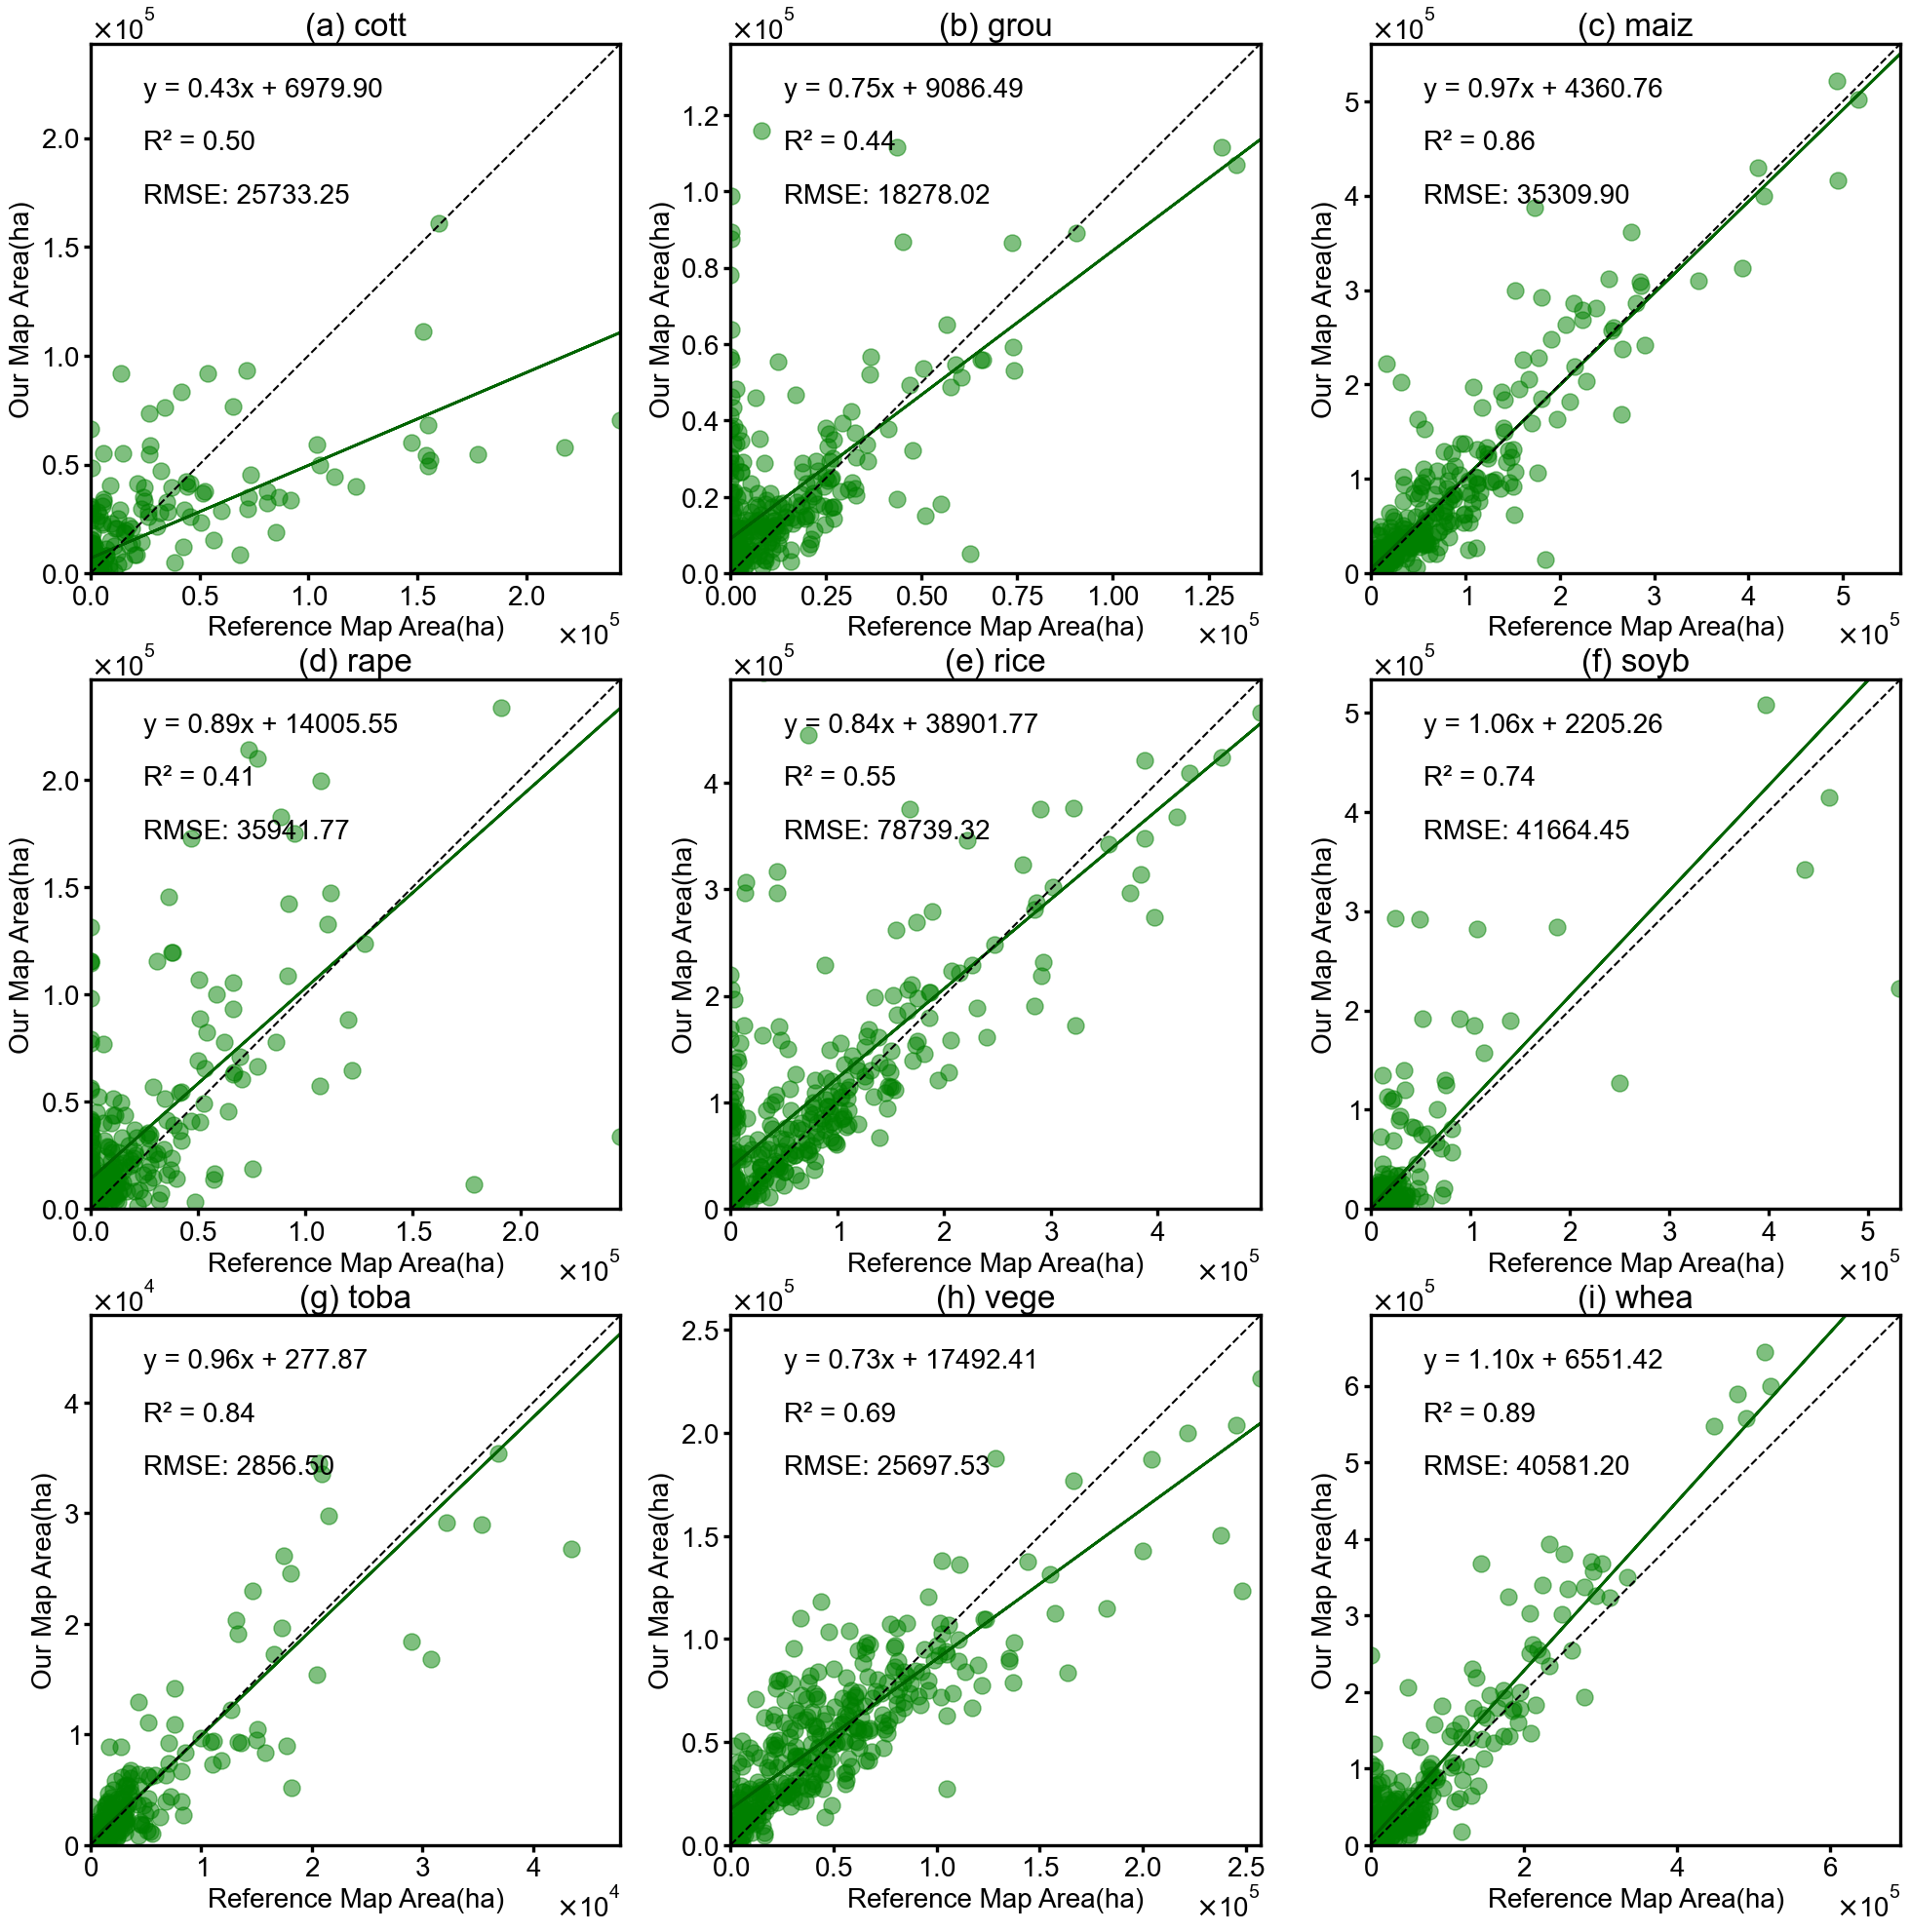

In [33]:
draw_scatter_plot_based_on_df_CHN()

In [ ]:
#calculate accuracy indice (Africa/USA, for use in Figure 6/8)

In [42]:
def calculate_rmse(df_c,crop_name):
    df_c=df_c.fillna(0)
    #df_c = df_c[(df_c[crop_name+'_1'] == 0) & (df_c[crop_name] != 0) | (df_c[crop_name+'_1'] != 0) & (df_c[crop_name] == 0) | (df_c[crop_name+'_1'] != 0) & (df_c[crop_name] != 0)]
    df_c = df_c[(df_c != 0).all(axis=1)]
    #df_c = df_c[(df_c <1).all(axis=1)]

    x=df_c[crop_name+'_1'].values
    y=df_c[crop_name].values
    
    error = x - y
    rmse = np.sqrt(np.mean(error**2))
    
    return rmse
    
def calculate_r_squared(df_c,crop_name):
    df_c=df_c.fillna(0)
    #df_c = df_c[(df_c[crop_name+'_1'] == 0) & (df_c[crop_name] != 0) | (df_c[crop_name+'_1'] != 0) & (df_c[crop_name] == 0) | (df_c[crop_name+'_1'] != 0) & (df_c[crop_name] != 0)]
    df_c = df_c[(df_c != 0).all(axis=1)]
    #df_c = df_c[(df_c <1).all(axis=1)]

    x=df_c[crop_name+'_1'].values
    y=df_c[crop_name].values
    
    coefficients = np.polyfit(x, y, 1)
    poly = np.poly1d(coefficients)
    y_fit = poly(x)

    # calculate R² value
    residuals = y - y_fit
    ss_res = np.sum(residuals ** 2)
    ss_tot = np.sum((y - np.mean(y)) ** 2)
    r_squared = 1 - (ss_res / ss_tot)
    
    return r_squared

In [ ]:
def draw_accuracy_index_based_on_df_USA():
    #df=df_c.fillna(0)
    crop_name_list=['whea', 'rice', 'maiz', 'barl', 'pmil', 'smil', 'sorg', 'ocer', 'pota', 'swpo', 'yams', 'cass', 'orts', 'bean', 'chic', 'cowp', 'pige', 'lent', 'opul', 'soyb', 'grou', 'cnut', 'oilp', 'sunf', 'rape', 'sesa', 'ooil', 'sugc', 'sugb', 'cott', 'ofib', 'acof', 'rcof', 'coco', 'teas', 'toba', 'bana', 'plnt', 'trof', 'temf', 'vege', 'rest']
    usda_name_list=['WHEAT','RICE','CORN','BARLEY','MILLET','MILLET','SORGHUM','','','','','','','BEANS','CHICKPEAS','','','LENTILS','','SOYBEANS','PEANUTS','','','SUNFLOWER','','','','SUGARCANE','SUGARBEETS','COTTON','','','','','','TOBACCO','','','','','','']
    crop_name_column=[]
    crop_name_column_1=[]
    for i in range(0,42,1):
        name=crop_name_list[i]
        crop_id=crop_name_list.index(name)
        USDA_name=usda_name_list[crop_id]
        if USDA_name!='' and USDA_name!='BEANS' and name!='chic':
            crop_name_column.append(name)
            crop_name_column_1.append(name+'_1')
    #print(crop_name_column)
    crop_name_column.sort()
    crop_name_column_1.sort()
    
    df_accuracy = pd.DataFrame(columns=['crop_id','SPAM_shortName','year','rmse','r_squared'])
    
    result_path_1='D:\\Research\\global_crop_dataset\\USA_Data_Layer\\Crop_map_USA_final_adjust_result_0613'
    indicator_path_1='D:\\Research\\global_crop_dataset\\USA_Data_Layer\\Indicator_USA'
    
    for year in range(2008,2023):#2008-2022
        if year==2010:
            continue
        '''
        df_c=get_img_refer_compare_df(year=year,result_path=result_path_1,indicator_path=indicator_path_1,region='usa')
        df=df_c.fillna(0)
        print(year)
        df.to_csv('D:\\Research\\global_crop_dataset\\table\\usa_result_df_accuracy_'+str(year)+'.csv')
        '''
        df=pd.read_csv('D:\\Research\\global_crop_dataset\\table\\usa_result_df_accuracy_'+str(year)+'.csv')
        for i in range(len(crop_name_column)):
            crop_name=crop_name_column[i]
            crop_id=crop_name_list.index(crop_name)
            USDA_name=usda_name_list[crop_id]
        
            df_c=df[[crop_name+'_1',crop_name]]
            #df_c = df_c[(df_c != 0).all(axis=1)]
            df_c = df_c[(df_c[crop_name+'_1'] != 0) & (df_c[crop_name] != 0)]
        
            rmse=calculate_rmse(df_c,crop_name)
            r_squared=calculate_r_squared(df_c,crop_name)
        
            df_accuracy = pd.concat([df_accuracy,pd.DataFrame([[i,crop_name,year,rmse,r_squared]],columns=df_accuracy.columns)])
    return df_accuracy

In [24]:
def draw_accuracy_index_based_on_df_PCAM():
    #df=df_c.fillna(0)
    crop_name_list=['whea', 'rice', 'maiz', 'barl', 'pmil', 'smil', 'sorg', 'ocer', 'pota', 'swpo', 'yams', 'cass', 'orts', 'bean', 'chic', 'cowp', 'pige', 'lent', 'opul', 'soyb', 'grou', 'cnut', 'oilp', 'sunf', 'rape', 'sesa', 'ooil', 'sugc', 'sugb', 'cott', 'ofib', 'acof', 'rcof', 'coco', 'teas', 'toba', 'bana', 'plnt', 'trof', 'temf', 'vege', 'rest']
    pcam_list=['16','9','4','1','','','11','','7','15','17','2','','','','','','','','12','3','','','14','8','','','','13','','','','','','','','','','','','','']

    crop_name_column=[]
    crop_name_column_1=[]
    for i in range(0,42,1):
        name=crop_name_list[i]
        crop_id=crop_name_list.index(name)
        pcam_id=pcam_list[crop_id]
        if pcam_id!='':
            crop_name_column.append(name)
            crop_name_column_1.append(name+'_1')
    #print(crop_name_column)
    crop_name_column.sort()
    crop_name_column_1.sort()
    
    df_accuracy = pd.DataFrame(columns=['crop_id','pcam_id','SPAM_shortName','year','rmse','r_squared'])

    
    for year in range(1961,2015):#1961-2014
        if year==2010:
            continue
        df_c=pd.read_csv('D:\\Research\\global_crop_dataset\\Result\\MapToCsv_PCAM_0511\\pixelCompare_AF_PCAM_'+str(year)+'.csv')
        df=df_c.fillna(0)
        for i in range(len(crop_name_column)):
            crop_name=crop_name_column[i]
            crop_id=crop_name_list.index(crop_name)
            pcam_id=pcam_list[crop_id]
            print(str(year)+'_'+crop_name)
            df_c=df[[crop_name+'_1',crop_name]]
            rmse=calculate_rmse(df_c,crop_name)
            if df_c[crop_name+'_1'].notnull().any() and not(df[crop_name+'_1'] == 0).all():
                r_squared=calculate_r_squared(df_c,crop_name)
            else:
                r_squared=-1
        
            df_accuracy = pd.concat([df_accuracy,pd.DataFrame([[i,pcam_id,crop_name,year,rmse,r_squared]],columns=df_accuracy.columns)])
            #print(df_accuracy)
    return df_accuracy

In [ ]:
# Scatter plot(Africa, Figure 4)

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import matplotlib.colors
from scipy.stats import gaussian_kde

matplotlib.rcParams.update(matplotlib.rcParamsDefault)
matplotlib.rcParams['font.sans-serif']='Arial'

def draw_scatter_plot_based_on_df_FAO_240607(df_c):
    df=df_c.fillna(0)
    crop_name_list=['maiz','sorg','pmil','smil','cass','whea','grou','cowp','rice','barl','coco','vege','bean','cott','oilp']
    subplot_label_list=['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o']
    #usda_name_list=['WHEAT','RICE','CORN','BARLEY','MILLET','MILLET','SORGHUM','','','','','','','BEANS','CHICKPEAS','','','LENTILS','','SOYBEANS','PEANUTS','','','SUNFLOWER','','','','SUGARCANE','SUGARBEETS','COTTON','','','','','','TOBACCO','','','','','','']
    crop_name_column=[]
    crop_name_column_1=[]
    for i in range(0,15,1):
        name=crop_name_list[i]
        crop_id=crop_name_list.index(name)
        crop_name_column.append(name)
        crop_name_column_1.append(name+'_1')
    #print(crop_name_column)
    crop_name_column.sort()
    crop_name_column_1.sort()


    # Create subplots
    #fig, axes = plt.subplots(nrows=6, ncols=7, figsize=(42, 42))
    
    fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(18, 28), subplot_kw={'aspect': 'equal'})
    # Adjust layout
    #plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)

    # Flatten the axes array to iterate over them
    axes = axes.flatten()

    # Plot each bar chart
    for i in range(len(crop_name_column)):
        ax = axes[i]
        crop_name=crop_name_column[i]
        crop_id=crop_name_list.index(crop_name)
        USDA_name=usda_name_list[crop_id]
        df_c=df[[crop_name+'_1',crop_name]]

        #df_c = df_c[(df_c[crop_name+'_1'] == 0) & (df_c[crop_name] != 0) | (df_c[crop_name+'_1'] != 0) & (df_c[crop_name] == 0) | (df_c[crop_name+'_1'] != 0) & (df_c[crop_name] != 0)]
        df_c = df_c[(df_c != 0).all(axis=1)]
        #df_c = df_c[(df_c <1).all(axis=1)]

        x=df_c[crop_name+'_1'].values
        y=df_c[crop_name].values

        error = x - y
        rmse = np.sqrt(np.mean(error**2))

        coefficients = np.polyfit(x, y, 1)
        poly = np.poly1d(coefficients)
        y_fit = poly(x)

        residuals = y - y_fit
        ss_res = np.sum(residuals ** 2)
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        r_squared = 1 - (ss_res / ss_tot)

        #ax.plot(x, y_fit, color='black',label=f'Fit: y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}\nR² = {r_squared:.2f}')

        '''
        x=x.values
        y=y.values
        xy=np.vstack([x,y])
        z=gaussian_kde(xy)(xy)
        idx=z.argsort()
        x,y,z=x[idx],y[idx],z[idx]
        ax.scatter(x,y,marker='o',c=z,edgecolors=None,s=15,cmap='Spectral_r')
        '''
        hb=ax.hexbin(df_c[crop_name+'_1'].replace(0, 0.1), df_c[crop_name].replace(0, 0.1), gridsize=(17,10), cmap='Greens', mincnt=1,edgecolors='none',xscale='log',yscale='log')

        if coefficients[1]>0:
            ax.text(0.1, 0.9, f'y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}', transform=ax.transAxes, ha='left',fontsize=16)
        else:
            ax.text(0.1, 0.9, f'y = {coefficients[0]:.2f}x - {(-1)*coefficients[1]:.2f}', transform=ax.transAxes, ha='left',fontsize=16)
        
        ax.text(0.1, 0.8, f'R² = {r_squared:.2f}', transform=ax.transAxes, ha='left',fontsize=16)
        ax.text(0.1, 0.7, f'RMSE: {rmse:.2f}', transform=ax.transAxes, ha='left',fontsize=16)
        ax.axis('equal')
        x_max = np.max(df_c[crop_name+'_1'])

        #ax.set_xscale('log')
        #ax.set_yscale('log')

        ax.set_xlabel('Reference Map Area(ha)',fontsize=16)
        ax.set_ylabel('Our Map Area(ha)',fontsize=16)
        ax.set_title('('+subplot_label_list[i]+') '+crop_name,fontsize=16)

        ticks = ax.get_xticks()
        labels = ax.get_xticklabels()
        ax.set_xticks(ticks, labels,fontsize=12)
        ticks = ax.get_yticks()
        labels = ax.get_yticklabels()
        ax.set_yticks(ticks, labels,fontsize=12)

        ax.set_xlim(0.1, x_max)
        ax.set_ylim(0.1, x_max)
        #daspect([1,1,1])
        #ax.axis('equal')
        #ax.set_aspect('equal', adjustable='box')
        
        # Colorbar.
        the_divider = make_axes_locatable(ax)
        color_axis = the_divider.append_axes("right", size="5%", pad=0.1)
        cb = fig.colorbar(hb, cax=color_axis, label='counts')

        #cax = cb.ax
        #cax.set_position([ax.get_position().x1 + 0.02, ax.get_position().y0, 0.02, ax.get_position().height*0.6])  # Adjust colorbar position
    '''   
    for ax in axes:
        #ax.set_aspect('equal', 'box') 
        #ax.set_aspect(1)
        #ax.set_aspect(1./ax.get_data_ratio())
        ax.set_aspect('equal', adjustable='box')
    '''
      # Adjust layout
    plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.01)
    plt.show()
    fig.savefig('D:\\Research\\global_crop_dataset\\pic\\af_2005_grid_map_compare_240611.jpg', dpi=600)

In [10]:
result_path_1='D:\\Research\\global_crop_dataset\\AF_Data_Layer\\Crop_map_AF_final_adjust_result_0428_dynamic'
indicator_path_1='D:\\Research\\global_crop_dataset\\AF_Data_Layer\\indicator_AF'
df=get_img_refer_compare_df(year=2005,result_path=result_path_1,indicator_path=indicator_path_1,region='africa')

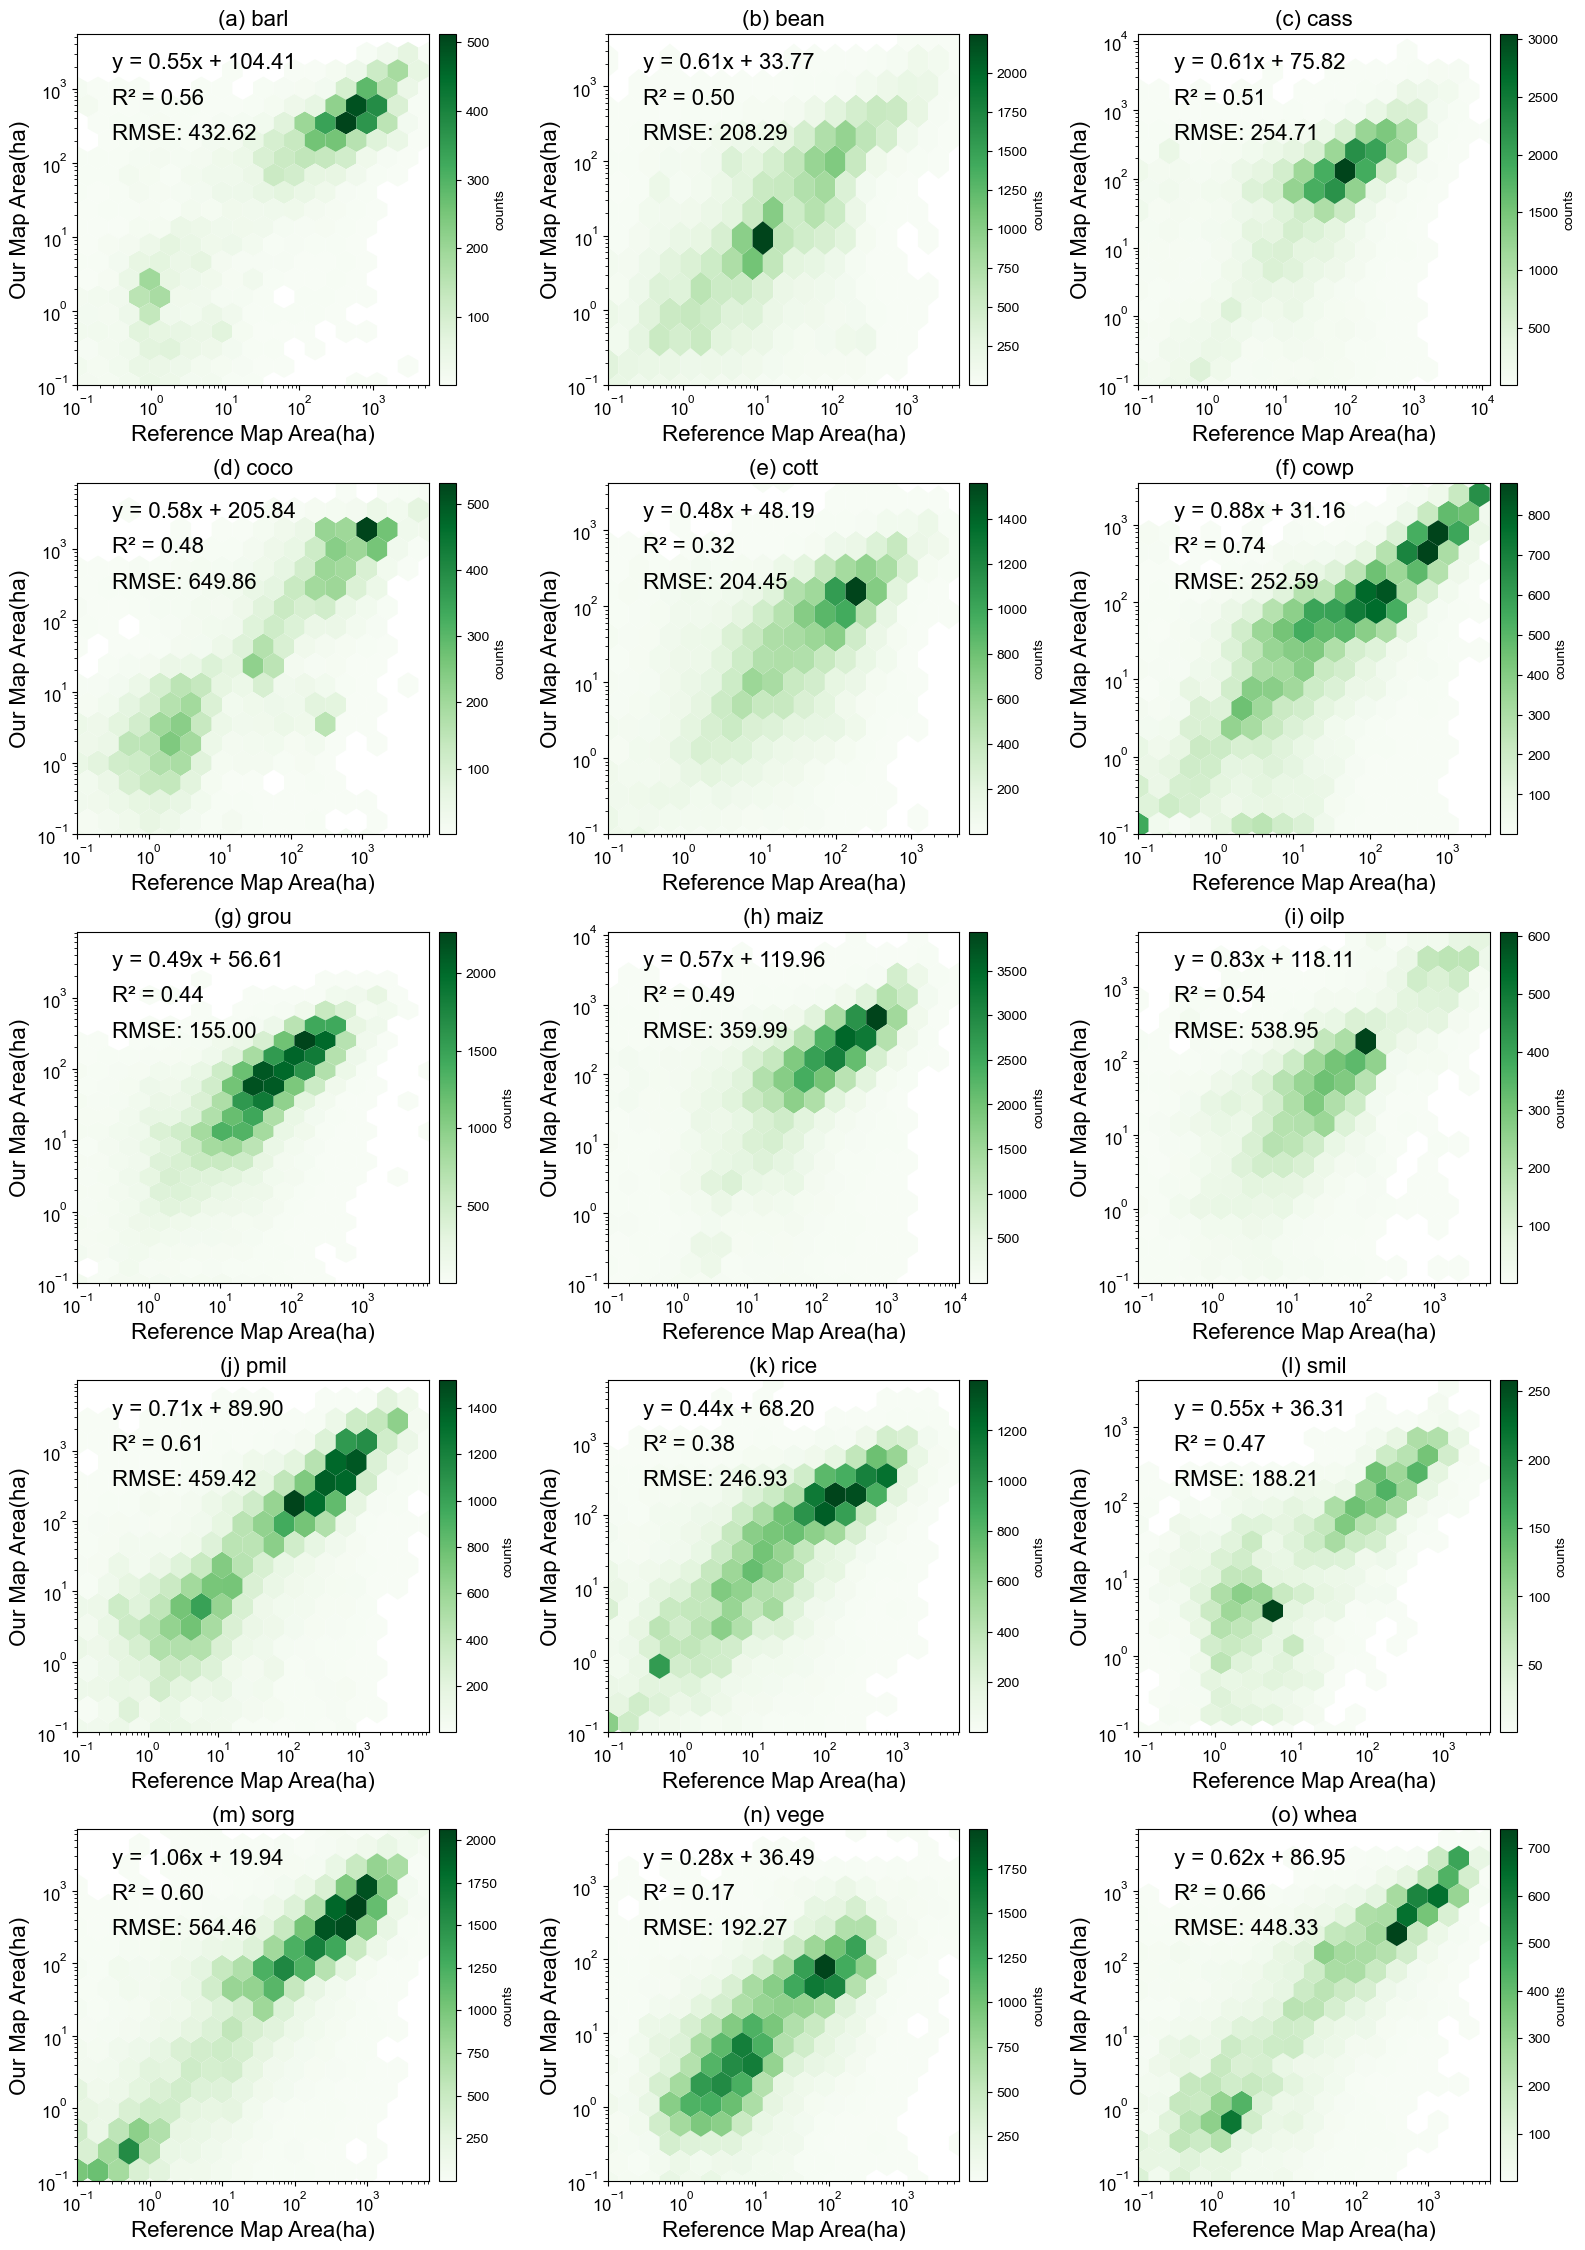

In [14]:
draw_scatter_plot_based_on_df_FAO_240607(df)

In [ ]:
#scatter plot(Our result VS statistic, Figure 9)

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import matplotlib.colors
from scipy.stats import gaussian_kde
import pandas as pd

df_af=pd.read_csv('D:\\Research\\global_crop_dataset\\table\\af_adm0_statistic_compare.csv')
df_chn=pd.read_csv('D:\\Research\\global_crop_dataset\\table\\chn_adm1_statistic_compare.csv')

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(36, 18), subplot_kw={'aspect': 'equal'})
   
axes = axes.flatten()

matplotlib.rcParams.update({'font.size': 36})
matplotlib.rcParams['font.sans-serif']='Arial'
plt.rcParams['axes.linewidth'] = 5
#plt.tick_params(width=2.4)

plt.rcParams['xtick.major.size']=5
plt.rcParams['xtick.major.width']=2.4
plt.rcParams['ytick.major.size']=5
plt.rcParams['ytick.major.width']=2.4

# Plot each bar chart
for i in range(0,2):
    if i==0:
        df=df_af
    else:
        df=df_chn
        
    ax = axes[i]
  
    df_c=df[['SPAM_area_after','STAT_area']]

    x=df_c['SPAM_area_after'].values
    y=df_c['STAT_area'].values


    # 进行线性拟合
    error = x - y
    rmse = np.sqrt(np.mean(error**2))

    coefficients = np.polyfit(x, y, 1)
    poly = np.poly1d(coefficients)
    y_fit = poly(x)

    # 计算 R² 值
    residuals = y - y_fit
    ss_res = np.sum(residuals ** 2)
    ss_tot = np.sum((y - np.mean(y)) ** 2)
    r_squared = 1 - (ss_res / ss_tot)

    # 绘制散点图和拟合线
    #ax.plot(x, y_fit, color='black',label=f'Fit: y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}\nR² = {r_squared:.2f}')

    ax.plot(x, y_fit,color='black',linewidth=4)
    ax.plot((0, 1), (0, 1), transform=ax.transAxes, ls='--',c='k', label="1:1 line")
    #hb=ax.hexbin(df_c['SPAM_area_after'].replace(0, 0.1), df_c['STAT_area'].replace(0, 0.1), gridsize=(17,10), cmap='Greens', mincnt=1,edgecolors='none',xscale='log',yscale='log')
    hb = ax.scatter(x, y, c='green', alpha=0.5,s=100)
    
    if coefficients[1]>0:
        ax.text(0.1, 0.9, f'y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}', transform=ax.transAxes, ha='left',fontsize=36)
    else:
        ax.text(0.1, 0.9, f'y = {coefficients[0]:.2f}x - {(-1)*coefficients[1]:.2f}', transform=ax.transAxes, ha='left',fontsize=36)
        
    ax.text(0.1, 0.8, f'R² = {r_squared:.2f}', transform=ax.transAxes, ha='left',fontsize=36)
    #ax.text(0.1, 0.7, f'RMSE: {rmse:.2f}', transform=ax.transAxes, ha='left',fontsize=30)
    ax.axis('equal')
    y_max = np.max(df_c['STAT_area'])
    print(y_max)

    #ax.set_xscale('log')
    #ax.set_yscale('log')


    ax.set_xlabel('Our Map Area(ha)',fontsize=36)
    ax.set_ylabel('Statistic Area(ha)',fontsize=36)
    if i==0:
        ax.set_title('(a) Africa',fontsize=42)
    else:
        ax.set_title('(b) China',fontsize=42)
    '''   
    ax.ticklabel_format(style='sci', scilimits=(0,0))
    ticks = ax.get_xticks()
    labels = ax.get_xticklabels()
    ax.set_xticks(ticks, labels,fontsize=20)
    ticks = ax.get_yticks()
    print(ticks)
    labels = ax.get_yticklabels()
    print(labels)
    ax.set_yticks(ticks, labels,fontsize=20)
    '''
    
    #ax.axis('equal')
    ax.set_xlim(0, y_max)
    ax.set_ylim(0, y_max)
    #daspect([1,1,1])
    ax.set_aspect('equal', adjustable='box')
        
    # Colorbar.
    '''
    the_divider = make_axes_locatable(ax)
    color_axis = the_divider.append_axes("right", size="5%", pad=0.1)
    cb = fig.colorbar(hb, cax=color_axis, label='counts')#,fontsize=24
    cb.ax.tick_params(labelsize=20) 
    '''
fig.savefig('D:\\Research\\global_crop_dataset\\pic\\statistic_map_compare_240611.jpg', dpi=600)
    #ax.set_xticklabels(ax.get_xticks(), fontsize=20)
    #ax.set_yticklabels(ax.get_yticks(), fontsize=20)